In [1]:
# predict the insurance fraud

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width',1000)

In [9]:
fraud=pd.read_csv('insurance_fraud.csv')
fraud.head(10)

months_as_customer  age  policy_number policy_bind_date policy_state policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  insured_zip insured_sex insured_education_level insured_occupation insured_hobbies insured_relationship  capital-gains  capital-loss incident_date             incident_type   collision_type incident_severity authorities_contacted incident_state incident_city   incident_location  incident_hour_of_the_day  number_of_vehicles_involved property_damage  bodily_injuries  witnesses police_report_available  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  auto_model  auto_year fraud_reported  _c39
0                 328   48         521585       17-10-2014           OH    250/500               1000                1406.91               0       466132        MALE                      MD       craft-repair        sleeping              husband          53300             0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage                Police             SC      Columbus      9935 4th Drive                         5                            1             YES                1          2                     YES               71610          6510           13020          52080       Saab         92x       2004              Y   NaN
1                 228   42         342868       27-06-2006           IN    250/500               2000                1197.22         5000000       468176        MALE                      MD  machine-op-inspct         reading       other-relative              0             0    21-01-2015             Vehicle Theft                ?      Minor Damage                Police             VA     Riverwood        6608 MLK Hwy                         8                            1               ?                0          0                       ?                5070           780             780           3510   Mercedes        E400       2007              Y   NaN
2                 134   29         687698       06-09-2000           OH    100/300               2000                1413.14         5000000       430632      FEMALE                     PhD              sales     board-games            own-child          35100             0    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage                Police             NY      Columbus   7121 Francis Lane                         7                            3              NO                2          3                      NO               34650          7700            3850          23100      Dodge         RAM       2007              N   NaN
3                 256   41         227811       25-05-1990           IL    250/500               2000                1415.74         6000000       608117      FEMALE                     PhD       armed-forces     board-games            unmarried          48900        -62400    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage                Police             OH     Arlington    6956 Maple Drive                         5                            1               ?                1          2                      NO               63400          6340            6340          50720  Chevrolet       Tahoe       2014              Y   NaN
4                 228   44         367455       06-06-2014           IL   500/1000               1000                1583.91         6000000       610706        MALE               Associate              sales     board-games            unmarried          66000        -46000    17-02-2015             Vehicle Theft                ?      Minor Damage                  None             NY     Arlington        3041 3rd Ave                        20                            1              NO                0          1                      NO                6500          1300             650           4550     Accura         RSX       2009              N   NaN
5                 2

In [4]:
fraud.shape

(1000, 40)

In [5]:
fraud.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
# all the values in _c39 are missing

In [7]:
# fraud.drop(['_c39'],axis=1,inplace=True)

In [8]:
fraud.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [10]:
fraud.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported', '_c39'], dtype='object')

# EDA

# Univariate

In [11]:
# categorical: policy_bind_date, policy_state, policy_csl, insured_sex, insured_education_level, insured_occupation, 
#              insured_hobbies, insured_relationship, incident_date, incident_type, collision_type, incident_severity,
#         authorities_contacted, incident_state, incident_city, incident_location, property_damage, police_report_available,
#         auto_make, auto_model, fraud_reported

In [12]:
# continuous: months_as_customer, age, policy_number, policy_deductable, policy_annual_premium, umbrella_limit, insured_zip,
#     capital-gains, capital-loss, incident_hour_of_the_day, number_of_vehicles_involved, bodily_injuries, witnesses,
#     total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_year

In [13]:
fraud['months_as_customer'].nunique()

391

In [14]:
fraud['age'].nunique()

46

In [15]:
fraud['policy_number'].nunique()

1000

In [34]:
# drop policy number

In [16]:
fraud['policy_deductable'].nunique()

3

In [17]:
fraud['policy_deductable'].value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

In [18]:
fraud['policy_annual_premium'].nunique()

991

In [36]:
# fraud['policy_annual_premium'].value_counts()

In [19]:
fraud['umbrella_limit'].nunique()

11

In [20]:
fraud['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [21]:
fraud['insured_zip'].nunique()

995

In [38]:
# fraud['insured_zip'].value_counts()

In [22]:
fraud['capital-gains'].nunique()

338

In [40]:
# fraud['capital-gains'].value_counts()

In [23]:
fraud['capital-loss'].nunique()

354

In [42]:
# fraud['capital-loss'].value_counts()

In [24]:
fraud['incident_hour_of_the_day'].nunique()

24

In [26]:
fraud['incident_hour_of_the_day'].value_counts()

17    54
3     53
0     52
23    51
16    49
4     46
13    46
10    46
6     44
9     43
14    43
21    42
18    41
7     40
19    40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64

In [25]:
fraud['number_of_vehicles_involved'].nunique()

4

In [27]:
fraud['number_of_vehicles_involved'].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

In [28]:
fraud['bodily_injuries'].nunique()

3

In [29]:
fraud['bodily_injuries'].value_counts()

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

In [30]:
fraud['witnesses'].nunique()

4

In [31]:
fraud['witnesses'].value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

In [ ]:
# continuous: months_as_customer, age, policy_number, policy_deductable, policy_annual_premium, umbrella_limit, insured_zip,
#     capital-gains, capital-loss, incident_hour_of_the_day, number_of_vehicles_involved, bodily_injuries, witnesses,
#     total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_year

In [43]:
fraud['total_claim_amount'].nunique()

763

In [50]:
# fraud['total_claim_amount'].value_counts()

In [44]:
fraud['injury_claim'].nunique()

638

In [52]:
# fraud['injury_claim'].value_counts()

In [45]:
fraud['property_claim'].nunique()

626

In [54]:
# fraud['property_claim'].value_counts()

In [46]:
fraud['vehicle_claim'].nunique()

726

In [47]:
fraud['auto_year'].nunique()

21

In [48]:
fraud['auto_year'].value_counts()

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [55]:
# categorical: policy_bind_date, policy_state, policy_csl, insured_sex, insured_education_level, insured_occupation, 
#              insured_hobbies, insured_relationship, incident_date, incident_type, collision_type, incident_severity,
#         authorities_contacted, incident_state, incident_city, incident_location, property_damage, police_report_available,
#         auto_make, auto_model, fraud_reported

In [57]:
fraud['policy_bind_date'].nunique()

951

In [58]:
# fraud['policy_bind_date'].value_counts().plot.bar()

In [59]:
fraud['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

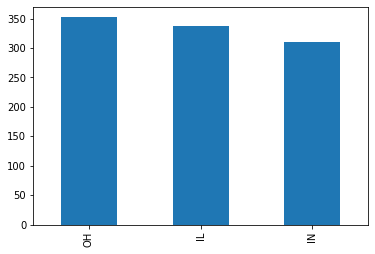

In [60]:
fraud['policy_state'].value_counts().plot.bar()

In [61]:
fraud['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

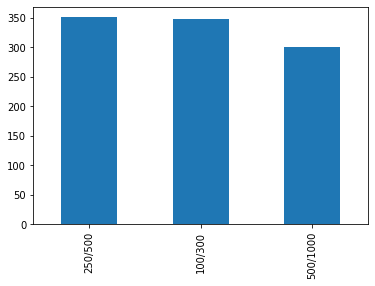

In [62]:
fraud['policy_csl'].value_counts().plot.bar()

In [63]:
fraud['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

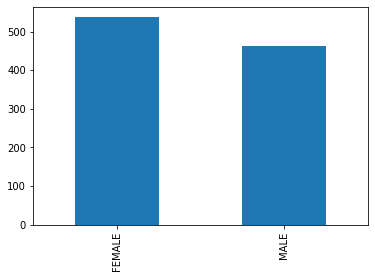

In [64]:
fraud['insured_sex'].value_counts().plot.bar()

In [65]:
fraud['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

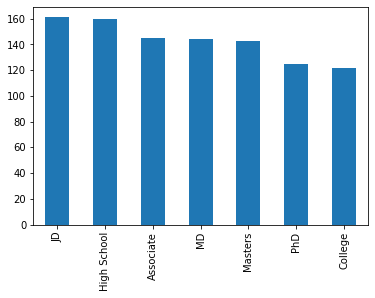

In [66]:
fraud['insured_education_level'].value_counts().plot.bar()

In [67]:
fraud['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

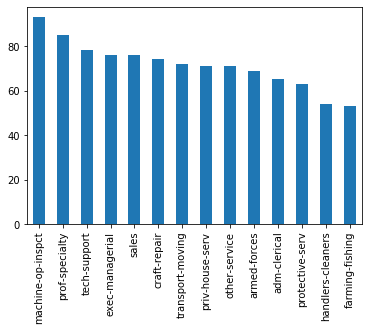

In [68]:
fraud['insured_occupation'].value_counts().plot.bar()

In [69]:
fraud['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
golf              55
camping           55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping      49
skydiving         49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

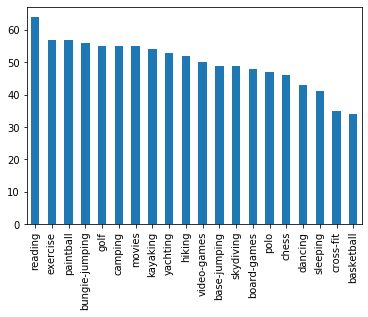

In [70]:
fraud['insured_hobbies'].value_counts().plot.bar()

In [71]:
fraud['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

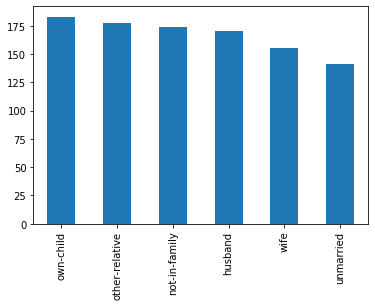

In [72]:
fraud['insured_relationship'].value_counts().plot.bar()

In [73]:
fraud['incident_date'].value_counts()

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
24-01-2015    24
04-02-2015    24
19-01-2015    23
08-01-2015    22
30-01-2015    21
13-01-2015    21
31-01-2015    20
12-02-2015    20
22-02-2015    20
06-02-2015    20
14-01-2015    19
12-01-2015    19
21-02-2015    19
01-01-2015    19
21-01-2015    19
23-02-2015    19
20-01-2015    18
14-02-2015    18
18-01-2015    18
01-02-2015    18
25-02-2015    18
28-02-2015    18
03-01-2015    18
06-01-2015    17
26-02-2015    17
09-01-2015    17
24-02-2015    17
08-02-2015    17
15-02-2015    16
16-02-2015    16
16-01-2015    16
05-02-2015    16
13-02-2015    16
18-02-2015    15
17-01-2015    15
28-01-2015    15
15-01-2015    15
22-01-2015    14
27-02-2015    14
20-02-2015    14
03-02-2015    13
27-01-2015    13
23-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
10-02-2015    10
07-02-2015    10
25-01-2015    10
19-02-2015    10
11-02-2015    10
11-01-2015    

In [74]:
fraud['incident_date'].nunique()

60

In [75]:
fraud['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

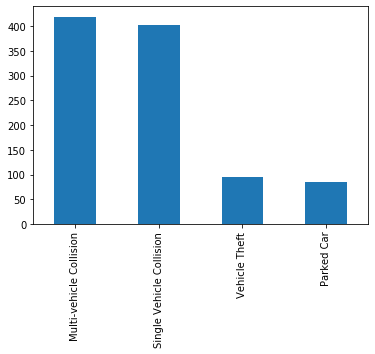

In [76]:
fraud['incident_type'].value_counts().plot.bar()

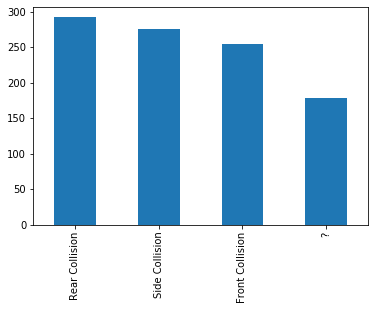

In [77]:
fraud['collision_type'].value_counts().plot.bar()

In [78]:
fraud['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [99]:
# missing value is there

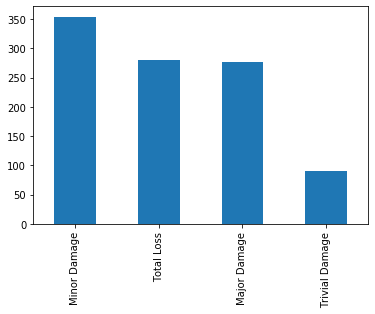

In [79]:
fraud['incident_severity'].value_counts().plot.bar()

In [80]:
fraud['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

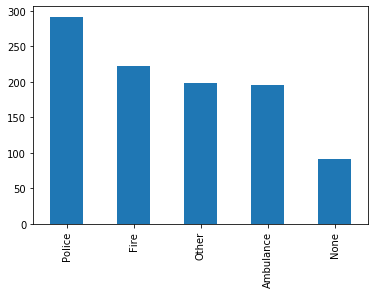

In [81]:
fraud['authorities_contacted'].value_counts().plot.bar()

In [82]:
fraud['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [ ]:
# categorical: policy_bind_date, policy_state, policy_csl, insured_sex, insured_education_level, insured_occupation, 
#              insured_hobbies, insured_relationship, incident_date, incident_type, collision_type, incident_severity,
#         authorities_contacted, incident_state, incident_city, incident_location, property_damage, police_report_available,
#         auto_make, auto_model, fraud_reported

In [83]:
fraud['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

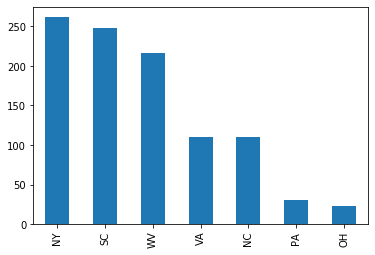

In [84]:
fraud['incident_state'].value_counts().plot.bar()

In [85]:
fraud['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

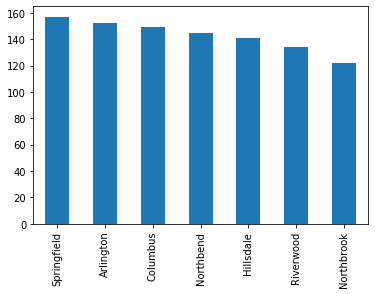

In [86]:
fraud['incident_city'].value_counts().plot.bar()

In [87]:
fraud['incident_location'].value_counts()

6158 Sky Ridge             1
9322 Rock Hwy              1
9418 5th Hwy               1
1830 Sky St                1
3172 Tree Ridge            1
4237 4th St                1
7756 Pine Hwy              1
6945 Texas Hwy             1
6522 Apache Drive          1
4672 MLK St                1
1469 Lincoln Drive         1
9489 3rd St                1
8188 Tree Ave              1
2123 Texas Ave             1
9067 Texas Ave             1
9103 MLK Lane              1
7780 Flute Lane            1
7649 Texas St              1
4279 Solo Drive            1
1123 5th Lane              1
1562 Britain St            1
2920 5th Ave               1
2204 Washington Lane       1
3930 Embaracadero St       1
6110 Rock Ridge            1
8832 Pine Drive            1
8212 Flute Ridge           1
4972 Francis Lane          1
3323 1st Lane              1
9239 Washington Ridge      1
6117 4th Ave               1
4107 MLK Ridge             1
3486 Flute Ave             1
4625 MLK Drive             1
5277 Texas Lan

In [100]:
# drop incident location

In [88]:
fraud['incident_location'].nunique()

1000

In [89]:
fraud['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [101]:
# missing value is there

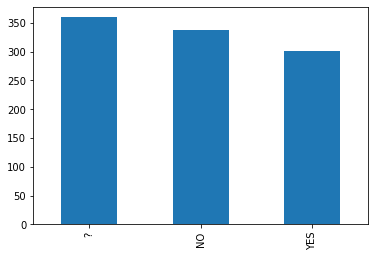

In [90]:
fraud['property_damage'].value_counts().plot.bar()

In [91]:
fraud['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [102]:
# missing value is there

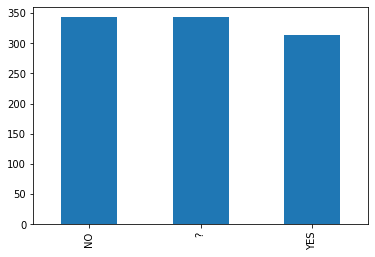

In [92]:
fraud['police_report_available'].value_counts().plot.bar()

In [93]:
fraud['auto_make'].value_counts()

Saab          80
Suburu        80
Dodge         80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

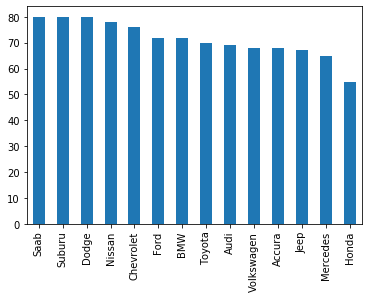

In [94]:
fraud['auto_make'].value_counts().plot.bar()

In [95]:
fraud['auto_model'].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
Forrestor         28
92x               28
Camry             28
95                27
F150              27
E400              27
Grand Cherokee    25
93                25
Maxima            24
Tahoe             24
Escape            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
Corolla           20
CRV               20
TL                20
Impreza           20
ML350             20
3 Series          18
C300              18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

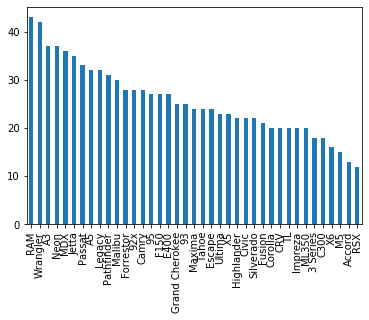

In [96]:
fraud['auto_model'].value_counts().plot.bar()

In [97]:
fraud['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

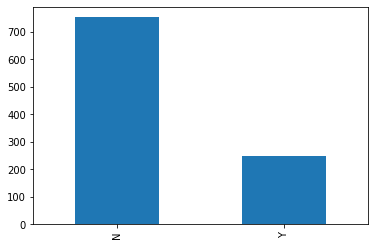

In [98]:
fraud['fraud_reported'].value_counts().plot.bar()

In [103]:
fraud.describe()[['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip',
    'capital-gains', 'capital-loss', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']]

months_as_customer          age  policy_deductable  policy_annual_premium  umbrella_limit    insured_zip  capital-gains   capital-loss  total_claim_amount  injury_claim  property_claim  vehicle_claim
count         1000.000000  1000.000000        1000.000000            1000.000000    1.000000e+03    1000.000000    1000.000000    1000.000000          1000.00000   1000.000000     1000.000000    1000.000000
mean           203.954000    38.948000        1136.000000            1256.406150    1.101000e+06  501214.488000   25126.100000  -26793.700000         52761.94000   7433.420000     7399.570000   37928.950000
std            115.113174     9.140287         611.864673             244.167395    2.297407e+06   71701.610941   27872.187708   28104.096686         26401.53319   4880.951853     4824.726179   18886.252893
min              0.000000    19.000000         500.000000             433.330000   -1.000000e+06  430104.000000       0.000000 -111100.000000           100.00000      0.000000        0.000000      70.000000
25%            115.750000    32.000000         500.000000            1089.607500    0.000000e+00  448404.500000       0.000000  -51500.000000         41812.50000   4295.000000     4445.000000   30292.500000
50%            199.500000    38.000000        1000.000000            1257.200000    0.000000e+00  466445.500000       0.000000  -23250.000000         58055.00000   6775.000000     6750.000000   42100.000000
75%            276.250000    44.000000        2000.000000            1415.695000    0.000000e+00  603251.000000   51025.000000       0.000000         70592.50000  11305.000000    10885.000000   50822.500000
max            479.000000    64.000000        2000.000000            2047.590000    1.000000e+07  620962.000000  100500.000000       0.000000        114920.00000  21450.000000    23670.000000   79560.000000

# Bivariate Analysis

In [106]:
# categorical: policy_bind_date, policy_state, policy_csl, insured_sex, insured_education_level, insured_occupation, 
#              insured_hobbies, insured_relationship, incident_date, incident_type, collision_type, incident_severity,
#         authorities_contacted, incident_state, incident_city, incident_location, property_damage, police_report_available,
#         auto_make, auto_model, fraud_reported

# incident_hour_of_the_day, number_of_vehicles_involved, bodily_injuries, witnesses, auto_year

In [107]:
# continuous: months_as_customer, age, policy_annual_premium, umbrella_limit, insured_zip,
#     capital-gains, capital-loss
#     total_claim_amount, injury_claim, property_claim, vehicle_claim

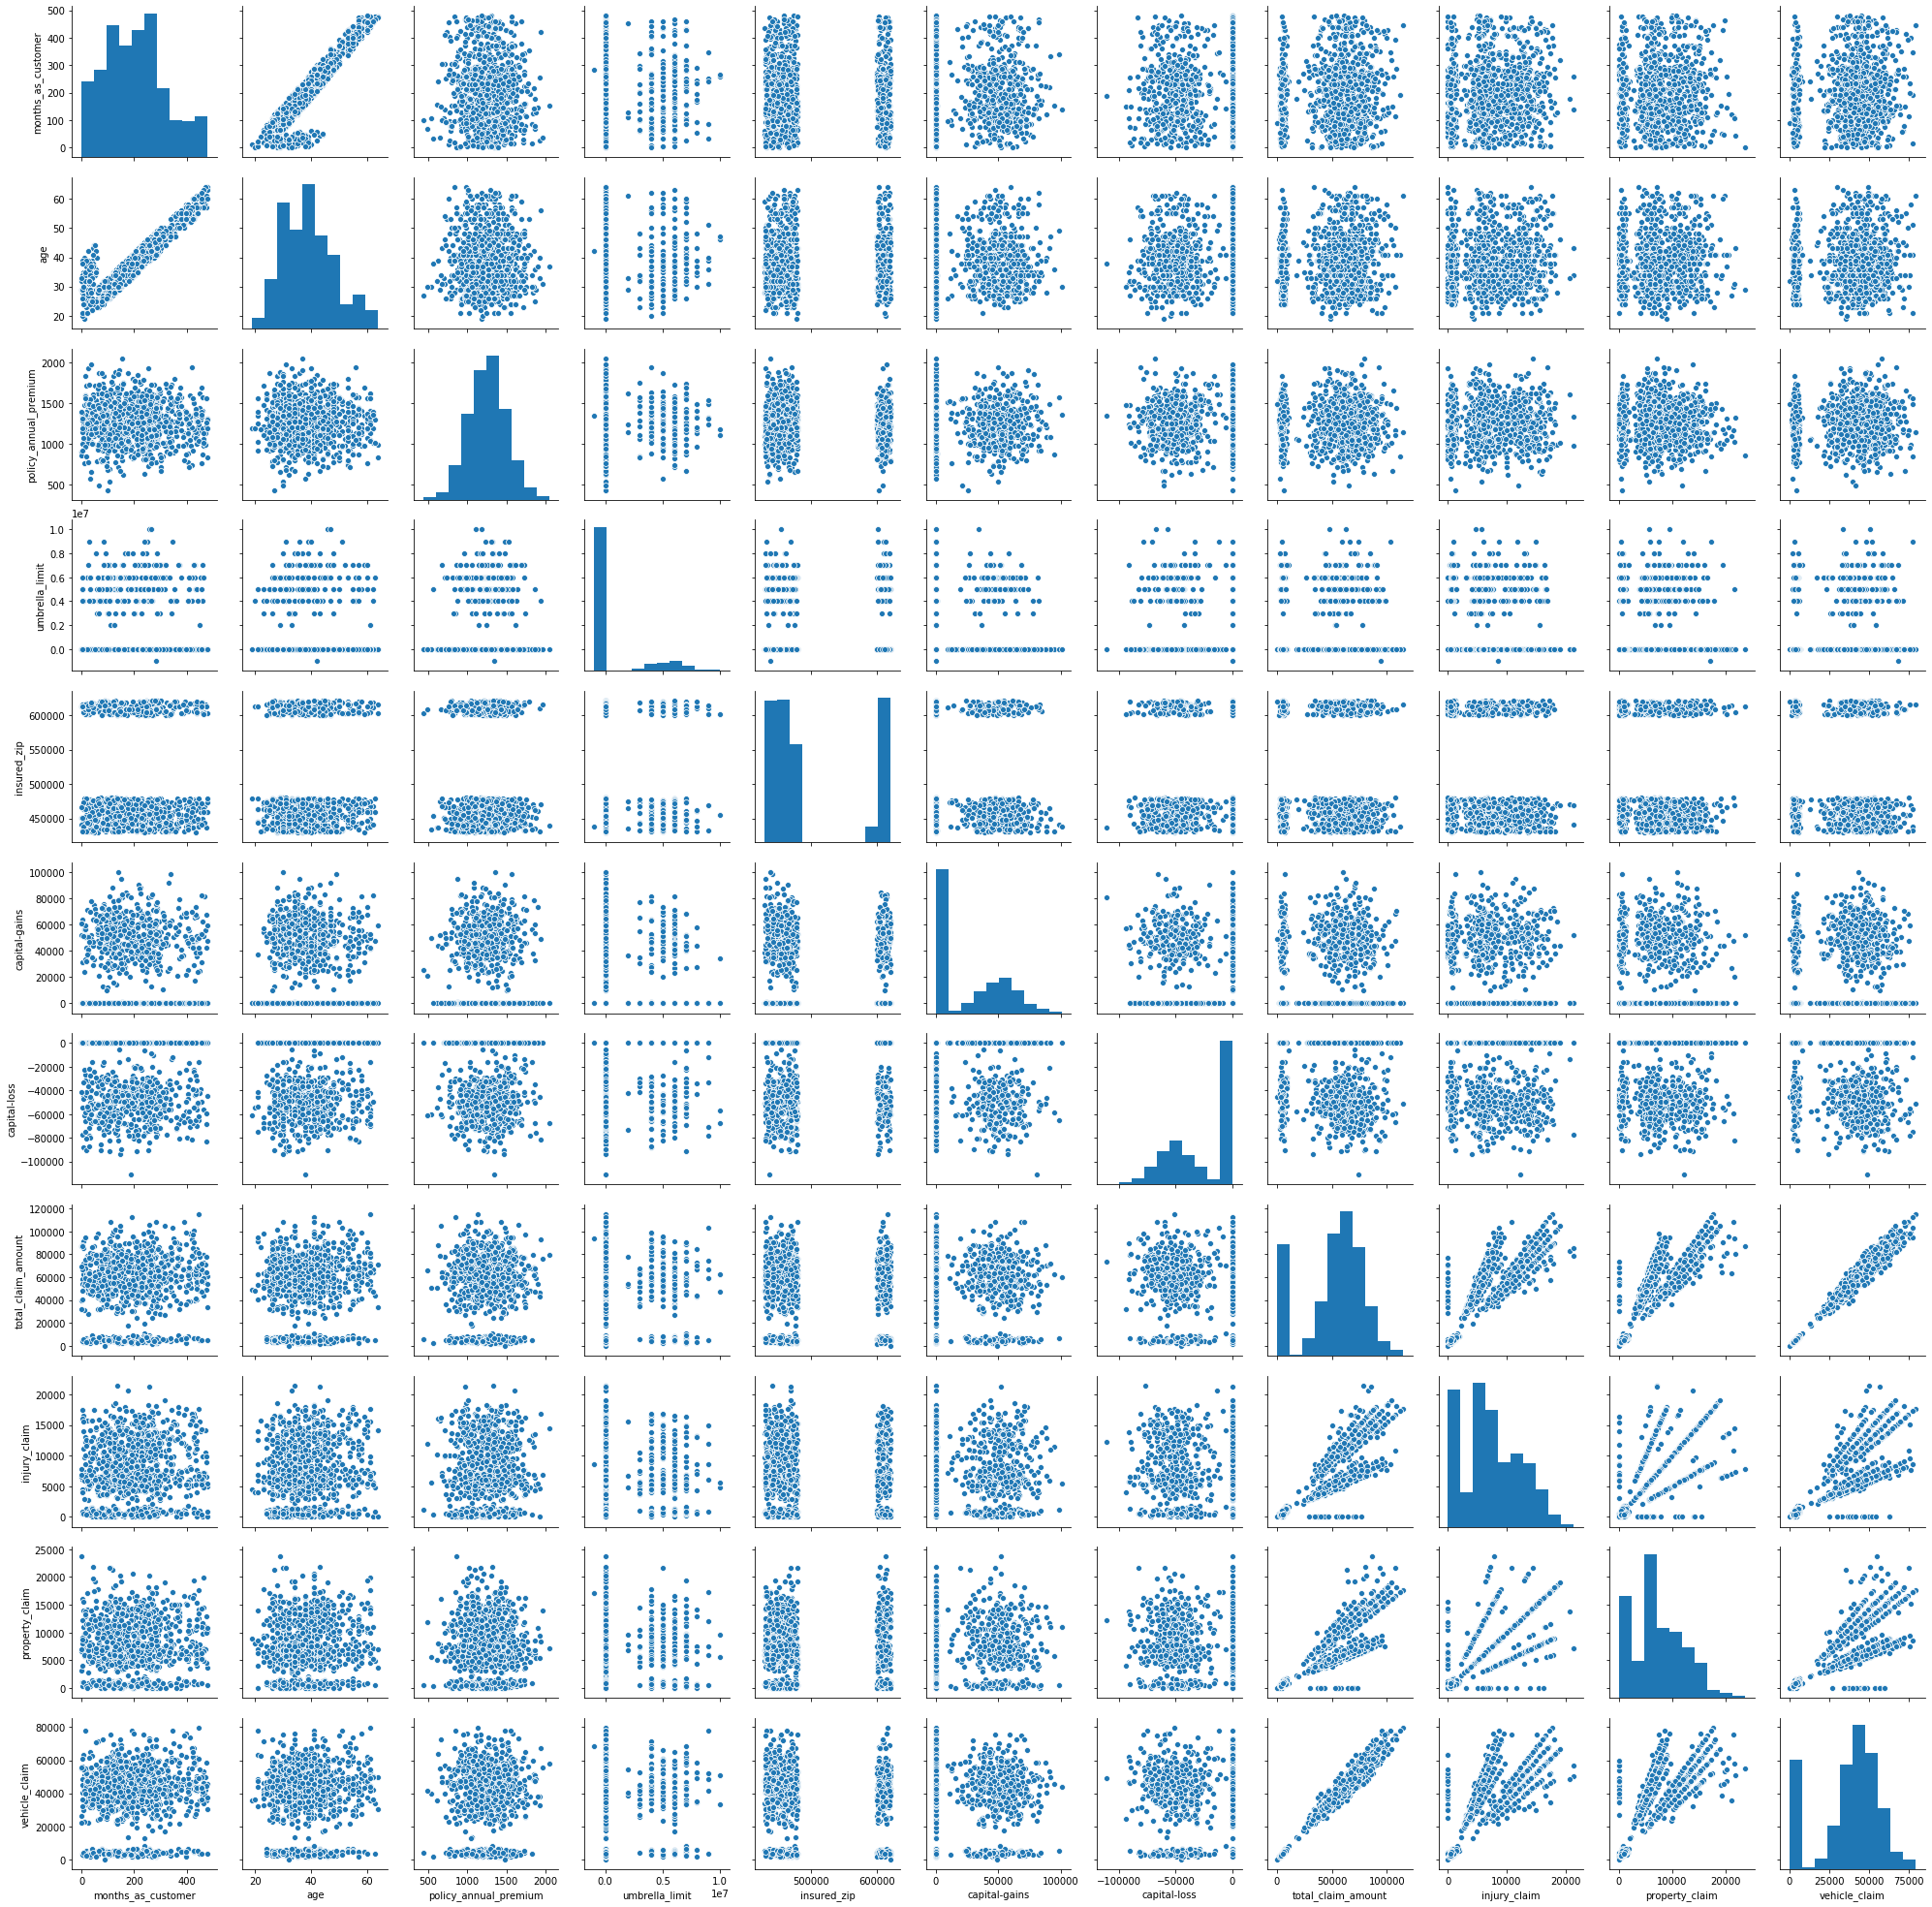

In [108]:
sns.pairplot(data=fraud,vars=['months_as_customer', 'age', 'policy_annual_premium', 'umbrella_limit', 'insured_zip',
'capital-gains', 'capital-loss','total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim'])

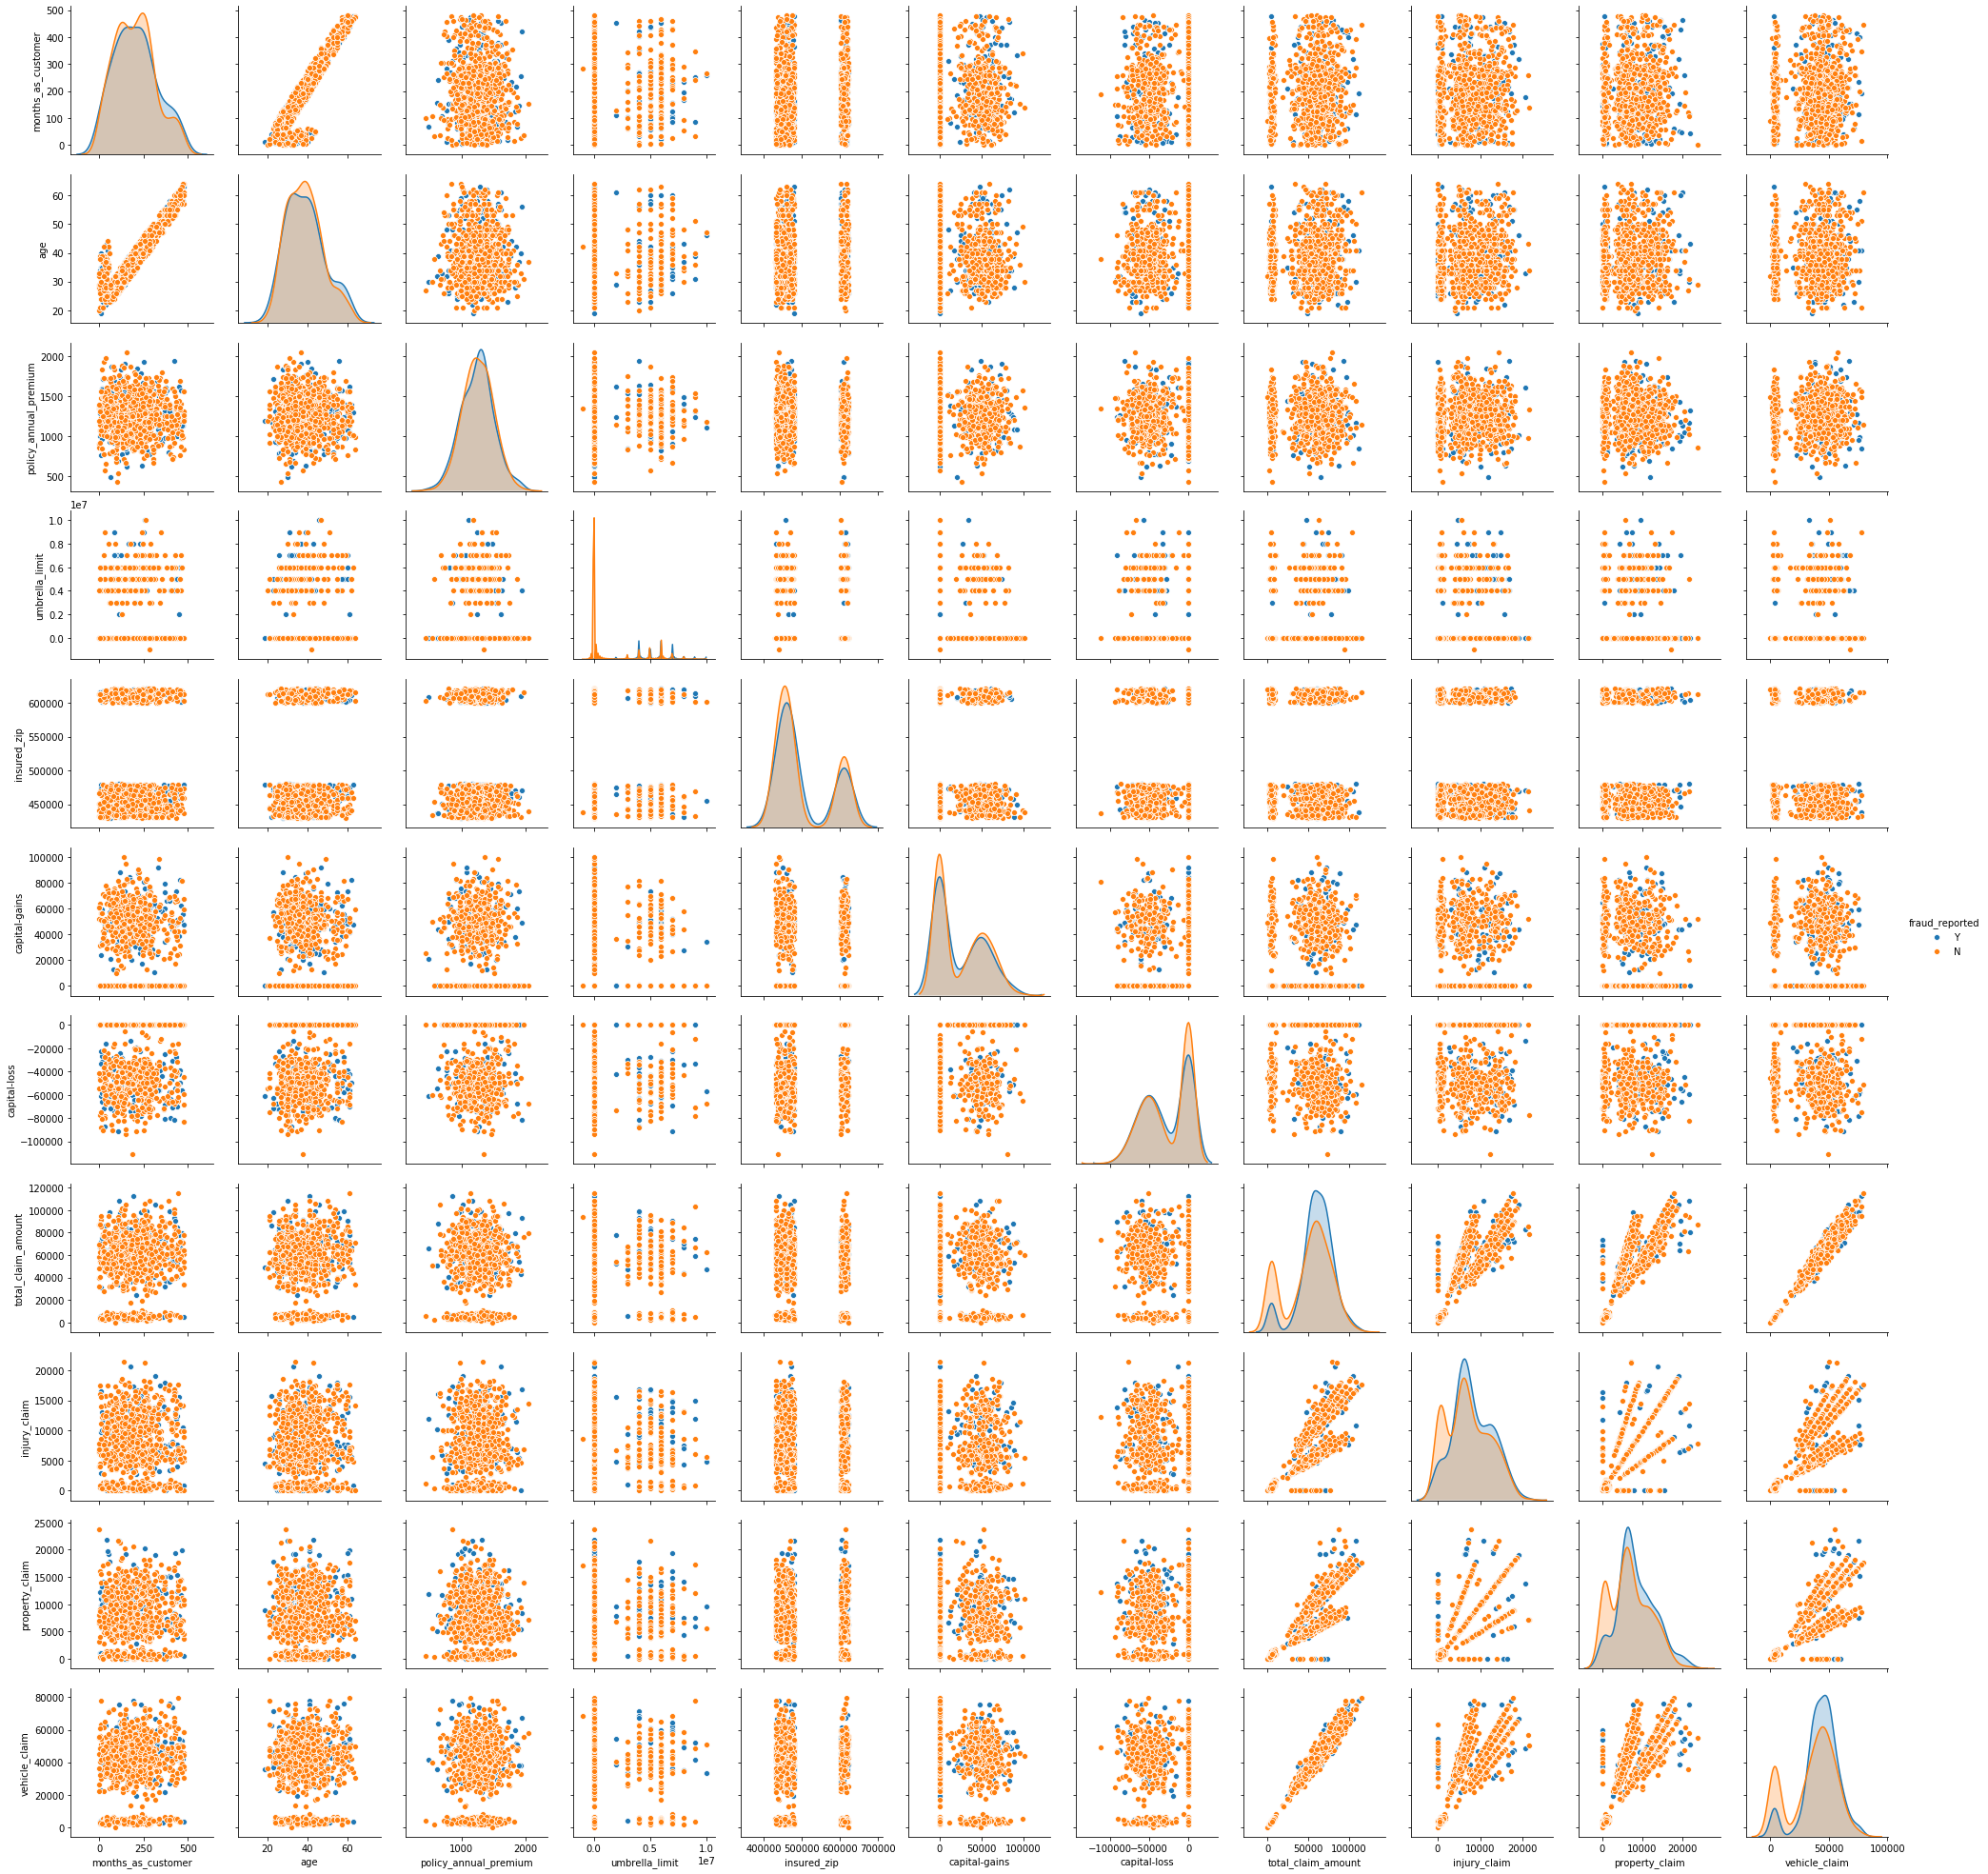

In [109]:
sns.pairplot(data=fraud,vars=['months_as_customer', 'age', 'policy_annual_premium', 'umbrella_limit', 'insured_zip',
'capital-gains', 'capital-loss','total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim'],hue='fraud_reported')

In [110]:
fraud.groupby('fraud_reported').mean()[['months_as_customer', 'age', 'policy_annual_premium',
'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']]

months_as_customer        age  policy_annual_premium  total_claim_amount  injury_claim  property_claim  vehicle_claim
fraud_reported                                                                                                                       
N                       202.600266  38.884462            1258.430000        50288.605578   7179.229748     7018.884462   36090.491368
Y                       208.080972  39.141700            1250.236275        60302.105263   8208.340081     8560.121457   43533.643725

In [112]:
pd.crosstab(fraud['policy_state'],fraud['fraud_reported'])

fraud_reported    N   Y
policy_state           
IL              261  77
IN              231  79
OH              261  91

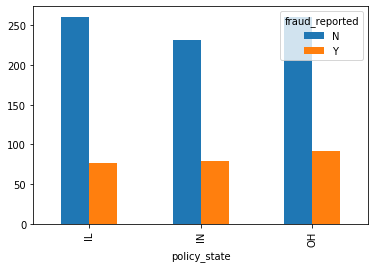

In [113]:
pd.crosstab(fraud['policy_state'],fraud['fraud_reported']).plot.bar()

In [114]:
pd.crosstab(fraud['policy_csl'],fraud['fraud_reported'])

fraud_reported    N   Y
policy_csl             
100/300         259  90
250/500         259  92
500/1000        235  65

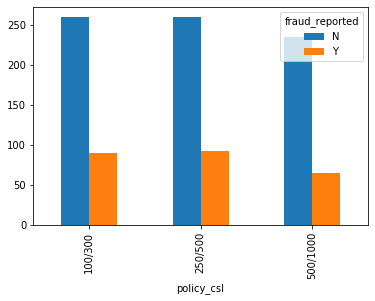

In [115]:
pd.crosstab(fraud['policy_csl'],fraud['fraud_reported']).plot.bar()

In [116]:
pd.crosstab(fraud['insured_sex'],fraud['fraud_reported'])

fraud_reported    N    Y
insured_sex             
FEMALE          411  126
MALE            342  121

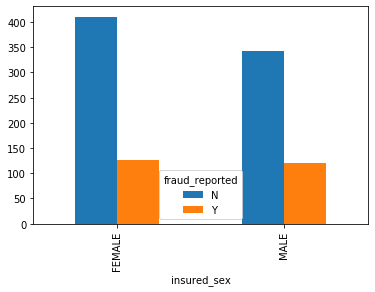

In [117]:
pd.crosstab(fraud['insured_sex'],fraud['fraud_reported']).plot.bar()

In [118]:
pd.crosstab(fraud['insured_education_level'],fraud['fraud_reported'])

fraud_reported             N   Y
insured_education_level         
Associate                111  34
College                   90  32
High School              124  36
JD                       119  42
MD                       106  38
Masters                  111  32
PhD                       92  33

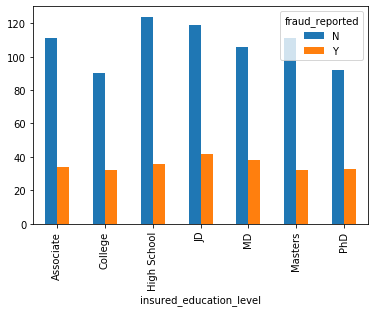

In [119]:
pd.crosstab(fraud['insured_education_level'],fraud['fraud_reported']).plot.bar()

In [120]:
pd.crosstab(fraud['insured_occupation'],fraud['fraud_reported'])

fraud_reported       N   Y
insured_occupation        
adm-clerical        54  11
armed-forces        52  17
craft-repair        52  22
exec-managerial     48  28
farming-fishing     37  16
handlers-cleaners   43  11
machine-op-inspct   71  22
other-service       59  12
priv-house-serv     59  12
prof-specialty      67  18
protective-serv     49  14
sales               55  21
tech-support        56  22
transport-moving    51  21

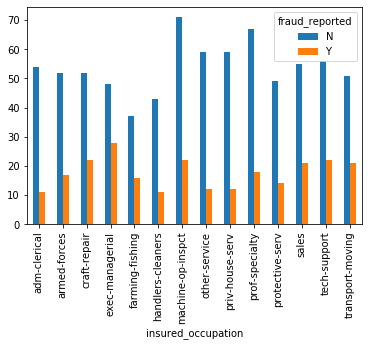

In [121]:
pd.crosstab(fraud['insured_occupation'],fraud['fraud_reported']).plot.bar()

In [122]:
pd.crosstab(fraud['insured_hobbies'],fraud['fraud_reported'])

fraud_reported    N   Y
insured_hobbies        
base-jumping     36  13
basketball       28   6
board-games      34  14
bungie-jumping   47   9
camping          50   5
chess             8  38
cross-fit         9  26
dancing          38   5
exercise         46  11
golf             49   6
hiking           40  12
kayaking         49   5
movies           46   9
paintball        44  13
polo             34  13
reading          47  17
skydiving        38  11
sleeping         33   8
video-games      40  10
yachting         37  16

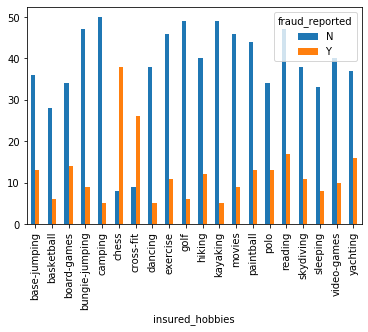

In [123]:
pd.crosstab(fraud['insured_hobbies'],fraud['fraud_reported']).plot.bar()

In [124]:
pd.crosstab(fraud['collision_type'],fraud['fraud_reported'])

fraud_reported     N   Y
collision_type          
?                162  16
Front Collision  184  70
Rear Collision   201  91
Side Collision   206  70

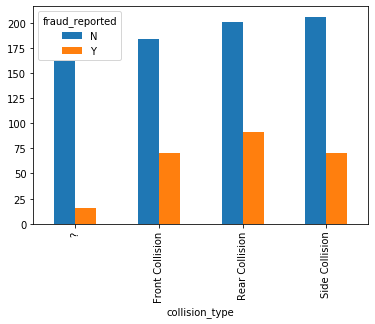

In [125]:
pd.crosstab(fraud['collision_type'],fraud['fraud_reported']).plot.bar()

In [126]:
pd.crosstab(fraud['incident_severity'],fraud['fraud_reported'])

fraud_reported       N    Y
incident_severity          
Major Damage       109  167
Minor Damage       316   38
Total Loss         244   36
Trivial Damage      84    6

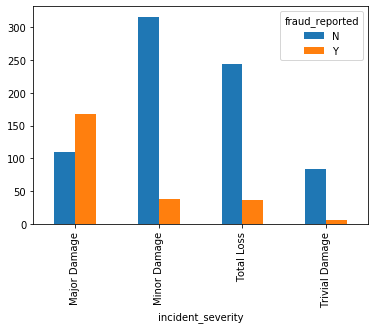

In [127]:
pd.crosstab(fraud['incident_severity'],fraud['fraud_reported']).plot.bar()

In [128]:
pd.crosstab(fraud['authorities_contacted'],fraud['fraud_reported'])

fraud_reported           N   Y
authorities_contacted         
Ambulance              139  57
Fire                   163  60
None                    85   6
Other                  135  63
Police                 231  61

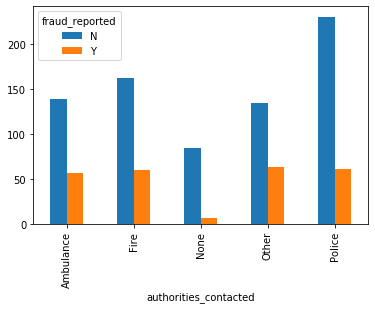

In [129]:
pd.crosstab(fraud['authorities_contacted'],fraud['fraud_reported']).plot.bar()

In [130]:
pd.crosstab(fraud['incident_state'],fraud['fraud_reported'])

fraud_reported    N   Y
incident_state         
NC               76  34
NY              204  58
OH               13  10
PA               22   8
SC              175  73
VA               85  25
WV              178  39

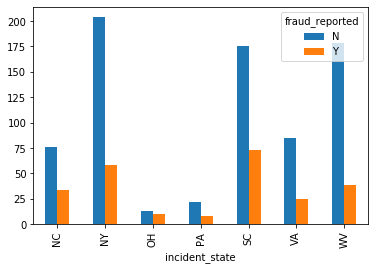

In [131]:
pd.crosstab(fraud['incident_state'],fraud['fraud_reported']).plot.bar()

In [132]:
pd.crosstab(fraud['property_damage'],fraud['fraud_reported'])

fraud_reported     N    Y
property_damage          
?                257  103
NO               272   66
YES              224   78

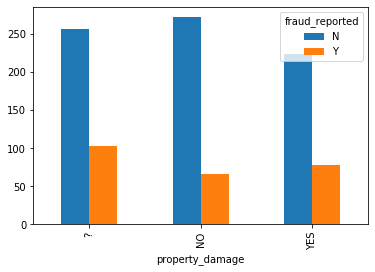

In [133]:
pd.crosstab(fraud['property_damage'],fraud['fraud_reported']).plot.bar()

In [134]:
pd.crosstab(fraud['police_report_available'],fraud['fraud_reported'])

fraud_reported             N   Y
police_report_available         
?                        254  89
NO                       257  86
YES                      242  72

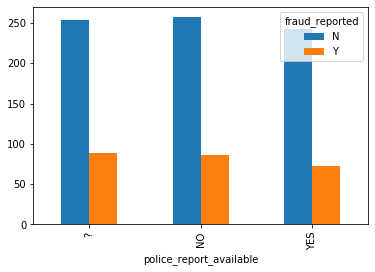

In [135]:
pd.crosstab(fraud['police_report_available'],fraud['fraud_reported']).plot.bar()

In [136]:
# 'months_as_customer', 'age', 'policy_annual_premium', 'umbrella_limit', 'insured_zip',
# 'capital-gains', 'capital-loss','total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim'

# Distribution and corr

In [137]:
# now, we'll drop the unnecessary features
# we'll create some new features owing to the missing values
# then we'll encode the values

In [138]:
fraud.drop(['policy_number','incident_location'],axis=1,inplace=True)

In [140]:
fraud[['policy_bind_date','incident_date','months_as_customer']]

policy_bind_date incident_date  months_as_customer
0         17-10-2014    25-01-2015                 328
1         27-06-2006    21-01-2015                 228
2         06-09-2000    22-02-2015                 134
3         25-05-1990    10-01-2015                 256
4         06-06-2014    17-02-2015                 228
5         12-10-2006    02-01-2015                 256
6         04-06-2000    13-01-2015                 137
7         03-02-1990    27-02-2015                 165
8         05-02-1997    30-01-2015                  27
9         25-07-2011    05-01-2015                 212
10        26-05-2002    06-01-2015                 235
11        29-05-1999    15-02-2015                 447
12        20-11-1997    22-01-2015                  60
13        26-10-2012    08-01-2015                 121
14        28-12-1998    15-01-2015                 180
15        19-10-1992    29-01-2015                 473
16        08-06-2005    22-02-2015                  70
17        15-11-2004    06-01-2015                 140
18        28-12-2014    19-01-2015                 160
19        02-08-1992    22-02-2015                 196
20        25-06-2002    01-01-2015                 460
21        27-11-2005    10-02-2015                 217
22        27-05-1994    11-01-2015                 370
23        08-02-1991    19-01-2015                 413
24        02-02-1996    24-02-2015                 237
25        05-12-2013    09-01-2015                   8
26        20-09-1990    28-01-2015                 257
27        18-07-2002    07-01-2015                 202
28        08-02-1990    08-01-2015                 224
29        04-03-2014    15-02-2015                 241
30        18-02-2000    18-01-2015                  64
31        19-06-2008    28-02-2015                 166
32        01-08-2003    24-02-2015                 155
33        04-04-1992    09-01-2015                 114
34        13-01-1991    12-02-2015                 149
35        08-08-2010    24-01-2015                 147
36        09-03-2003    09-01-2015                  62
37        03-02-1993    18-01-2015                 289
38        25-11-2002    21-01-2015                 431
39        27-07-1997    08-01-2015                 199
40        08-05-1995    03-01-2015                  79
41        30-08-2012    01-01-2015                 116
42        30-04-2006    16-01-2015                  37
43        13-04-2003    10-02-2015                 106
44        05-12-2007    14-02-2015                 269
45        21-08-2006    21-02-2015                 265
46        08-01-1990    18-02-2015                 163
47        18-03-1990    10-01-2015                 355
48        07-01-2008    26-02-2015                 175
49        10-03-1997    01-01-2015                 192
50        10-01-2004    03-01-2015                 430
51        20-08-1994    17-01-2015                  91
52        02-06-2002    22-02-2015                 217
53        28-04-1994    27-01-2015                 223
54        17-08-2014    27-02-2015                 195
55        11-08-2007    06-01-2015                  22
56        20-11-2008    28-02-2015                 439
57        18-10-1995    22-02-2015                  94
58        19-05-1993    07-01-2015                  11
59        26-02-2005    06-01-2015                 151
60        14-02-1990    10-01-2015                 154
61        30-09-1993    11-02-2015                 245
62        10-06-2014    12-01-2015                 119
63        28-10-2008    06-02-2015                 215
64        24-04-2007    20-01-2015                 295
65        13-12-1993    22-02-2015                 254
66        17-08-2011    30-01-2015                 107
67        20-08-1990    02-02-2015                 478
68        11-02-1994    10-01-2015                 128
69        22-02-1994    27-02-2015                 338
70        15-08-2011    20-02-2015                 271
71        11-11-1998    08-02-2015          

In [142]:
# lets create a new feature duration using policy_bind_date,incident_date and then drop both

In [143]:
fraud['policy_bind_date']=pd.to_datetime(fraud['policy_bind_date'])
fraud['incident_date']=pd.to_datetime(fraud['incident_date'])

In [147]:
fraud['duration']=fraud.apply(lambda x: (x['incident_date']-x['policy_bind_date']).days,axis=1)

In [148]:
fraud[['policy_bind_date','incident_date','duration']]

policy_bind_date incident_date  duration
0         2014-10-17    2015-01-25       100
1         2006-06-27    2015-01-21      3130
2         2000-06-09    2015-02-22      5371
3         1990-05-25    2015-10-01      9260
4         2014-06-06    2015-02-17       256
5         2006-12-10    2015-02-01      2975
6         2000-04-06    2015-01-13      5395
7         1990-03-02    2015-02-27      9128
8         1997-05-02    2015-01-30      6482
9         2011-07-25    2015-05-01      1376
10        2002-05-26    2015-06-01      4754
11        1999-05-29    2015-02-15      5741
12        1997-11-20    2015-01-22      6272
13        2012-10-26    2015-08-01      1009
14        1998-12-28    2015-01-15      5862
15        1992-10-19    2015-01-29      8137
16        2005-08-06    2015-02-22      3487
17        2004-11-15    2015-06-01      3850
18        2014-12-28    2015-01-19        22
19        1992-02-08    2015-02-22      8415
20        2002-06-25    2015-01-01      4573
21        2005-11-27    2015-10-02      3596
22        1994-05-27    2015-11-01      7828
23        1991-08-02    2015-01-19      8571
24        1996-02-02    2015-02-24      6962
25        2013-05-12    2015-09-01       842
26        1990-09-20    2015-01-28      8896
27        2002-07-18    2015-07-01      4731
28        1990-08-02    2015-08-01      9130
29        2014-04-03    2015-02-15       318
30        2000-02-18    2015-01-18      5448
31        2008-06-19    2015-02-28      2445
32        2003-01-08    2015-02-24      4430
33        1992-04-04    2015-09-01      8550
34        1991-01-13    2015-12-02      9089
35        2010-08-08    2015-01-24      1630
36        2003-09-03    2015-09-01      4381
37        1993-03-02    2015-01-18      7992
38        2002-11-25    2015-01-21      4440
39        1997-07-27    2015-08-01      6579
40        1995-08-05    2015-03-01      7148
41        2012-08-30    2015-01-01       854
42        2006-04-30    2015-01-16      3183
43        2003-04-13    2015-10-02      4555
44        2007-05-12    2015-02-14      2835
45        2006-08-21    2015-02-21      3106
46        1990-08-01    2015-02-18      8967
47        1990-03-18    2015-10-01      9328
48        2008-07-01    2015-02-26      2431
49        1997-10-03    2015-01-01      6299
50        2004-10-01    2015-03-01      3803
51        1994-08-20    2015-01-17      7455
52        2002-02-06    2015-02-22      4764
53        1994-04-28    2015-01-27      7579
54        2014-08-17    2015-02-27       194
55        2007-11-08    2015-06-01      2762
56        2008-11-20    2015-02-28      2291
57        1995-10-18    2015-02-22      7067
58        1993-05-19    2015-07-01      8078
59        2005-02-26    2015-06-01      3747
60        1990-02-14    2015-10-01      9360
61        1993-09-30    2015-11-02      8068
62        2014-10-06    2015-12-01       421
63        2008-10-28    2015-06-02      2408
64        2007-04-24    2015-01-20      2828
65        1993-12-13    2015-02-22      7741
66        2011-08-17    2015-01-30      1262
67        1990-08-20    2015-02-02      8932
68        1994-11-02    2015-10-01      7638
69        1994-02-22    2015-02-27      7675
70        2011-08-15    2015-02-20      1285
71        1998-11-11    2015-08-02      6108
72        1995-04-12    2015-11-02      7509
73        2002-12-28    2015-02-23      4440
74        2004-04-15    2015-01-03      3915
75        2001-02-02    2015-01-15      5095
76        2010-12-01    2015-01-14      1505
77        1992-04-14    2015-02-17      8344
78        2010-05-21    2015-01-24      1709
79        2013-10-27    2015-01-21       451
80        1994-12-10    2015-02-19      7376
81        1997-04-07    2015-03-01      6537
82        2011-02-15    2015-01-29      1444
83        1994-08-21    2015-01-19      7456
84        1997-05-15    2015-01-19      6458
85        1996-10-26    2015-02-02      6673
86        2006-04-03    2015-01-30      3224
87        1991-02-01    2015-08-01      8947

In [149]:
fraud.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [151]:
# creating new features
fraud['collision_type_miss']=0
fraud['police_report_available_miss']=0
fraud['property_damage_miss']=0
for i in range(len(fraud)):
    if fraud['collision_type'].iloc[i]=='?':
        fraud['collision_type_miss'].iloc[i]=1

In [152]:
for i in range(len(fraud)):
    if fraud['police_report_available'].iloc[i]=='?':
        fraud['police_report_available_miss'].iloc[i]=1

In [153]:
for i in range(len(fraud)):
    if fraud['property_damage'].iloc[i]=='?':
        fraud['property_damage_miss'].iloc[i]=1

In [154]:
fraud['collision_type_miss'].value_counts()

0    822
1    178
Name: collision_type_miss, dtype: int64

In [155]:
fraud['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [156]:
fraud['police_report_available_miss'].value_counts()

0    657
1    343
Name: police_report_available_miss, dtype: int64

In [157]:
fraud['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [158]:
fraud['property_damage_miss'].value_counts()

0    640
1    360
Name: property_damage_miss, dtype: int64

In [159]:
fraud['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [160]:
# lets encode the features
from sklearn.preprocessing import LabelEncoder
def le(df,col):
    lab=LabelEncoder()
    df[col]=pd.Series(lab.fit_transform(df[col]))

In [161]:
fraud.dtypes

months_as_customer                int64
age                               int64
policy_state                     object
policy_csl                       object
policy_deductable                 int64
policy_annual_premium           float64
umbrella_limit                    int64
insured_zip                       int64
insured_sex                      object
insured_education_level          object
insured_occupation               object
insured_hobbies                  object
insured_relationship             object
capital-gains                     int64
capital-loss                      int64
incident_type                    object
collision_type                   object
incident_severity                object
authorities_contacted            object
incident_state                   object
incident_city                    object
incident_hour_of_the_day          int64
number_of_vehicles_involved       int64
property_damage                  object
bodily_injuries                   int64


In [168]:
le(fraud,'incident_severity')
le(fraud,'authorities_contacted')
le(fraud,'incident_state')
le(fraud,'incident_city')
le(fraud,'property_damage')
le(fraud,'police_report_available')
le(fraud,'auto_make')
le(fraud,'auto_model')
le(fraud,'fraud_reported')

In [169]:
le(fraud,'policy_state')
le(fraud,'policy_csl')
le(fraud,'insured_sex')
le(fraud,'insured_education_level')
le(fraud,'insured_occupation')
le(fraud,'insured_hobbies')
le(fraud,'insured_relationship')
le(fraud,'incident_type')
le(fraud,'collision_type')

In [164]:
fraud.drop('_c39',axis=1,inplace=True)

In [170]:
fraud.head()

months_as_customer  age  policy_state  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  insured_sex  insured_education_level  insured_occupation  insured_hobbies  insured_relationship  capital-gains  capital-loss  incident_type  collision_type  incident_severity  authorities_contacted  incident_state  incident_city  incident_hour_of_the_day  number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  police_report_available  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  auto_model  auto_year  fraud_reported  duration  collision_type_miss  police_report_available_miss  property_damage_miss
0                 328   48             2           1               1000                1406.91               0       466132            1                        4                   2               17                     0          53300             0              2               3                  0                      4               4              1                         5                            1                2                1          2                        2               71610          6510           13020          52080         10           1       2004               1       100                    0                             0                     0
1                 228   42             1           1               2000                1197.22         5000000       468176            1                        4                   6               15                     2              0             0              3               0                  1                      4               5              5                         8                            1                0                0          0                        0                5070           780             780           3510          8          12       2007               1      3130                    1                             1                     1
2                 134   29             2           0               2000                1413.14         5000000       430632            0                        6                  11                2                     3          35100             0              0               2                  1                      4               1              1                         7                            3                1                2          3                        1               34650          7700            3850          23100          4          30       2007               0      5371                    0                             0                     0
3                 256   41             0           1               2000                1415.74         6000000       608117            0                        6                   1                2                     4          48900        -62400              2               1                  0                      4               2              0                         5                            1                0                1          2                        1               63400          6340            6340          50720          3          34       2014               1      9260                    0                             0                     1
4                 228   44             0           2               1000                1583.91         6000000       610706            1                        0                  11                2                     4          66000        -46000              3               0                  1                      2               1              0                        20                            1                1                0          1                        1                6500          1300             650           4550          0          31       2009               0       256               

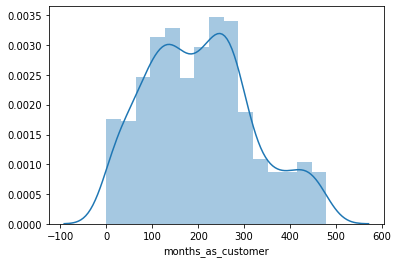

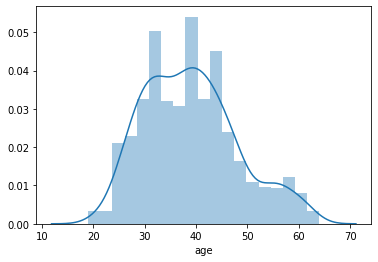

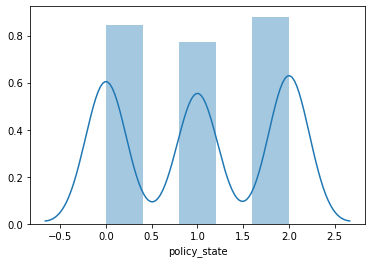

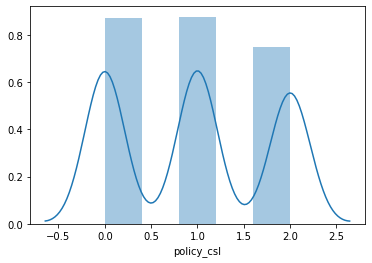

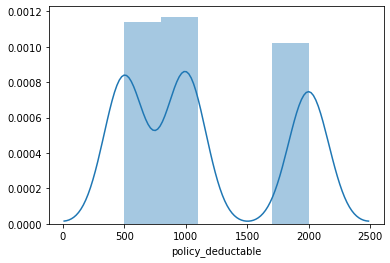

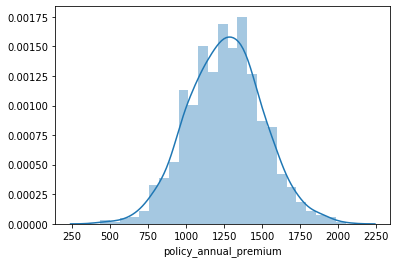

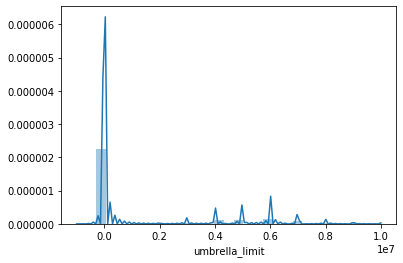

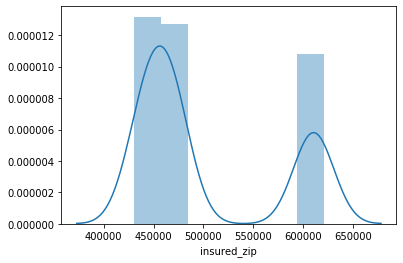

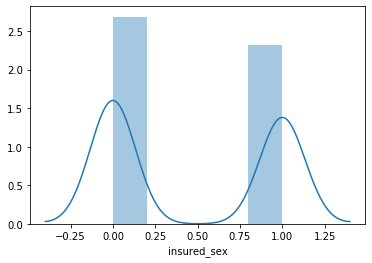

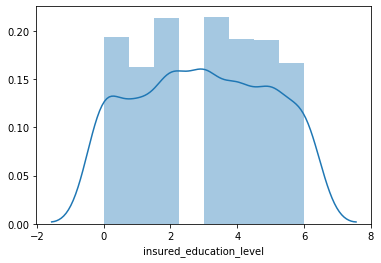

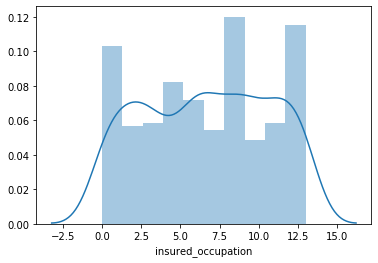

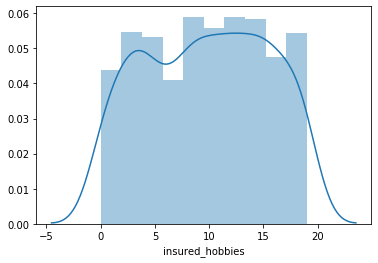

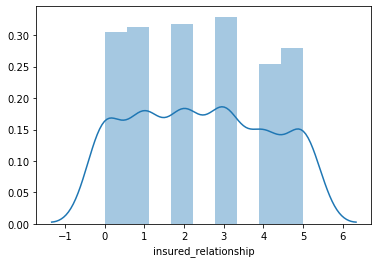

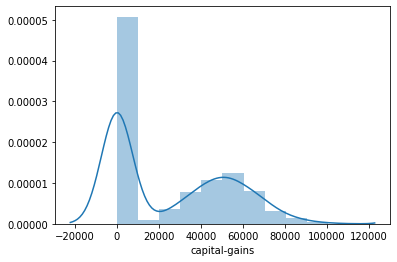

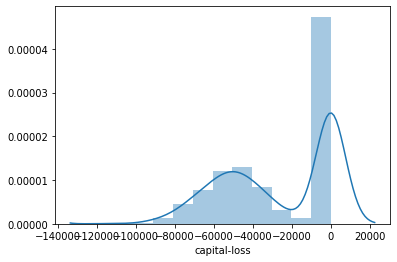

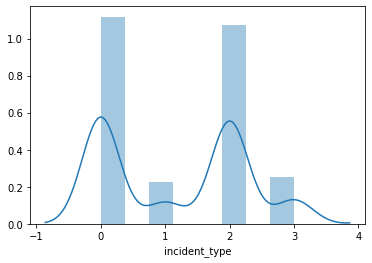

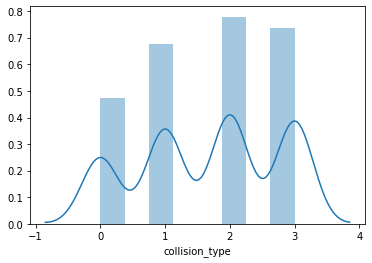

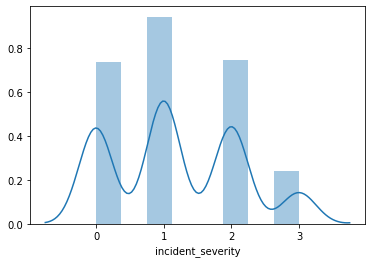

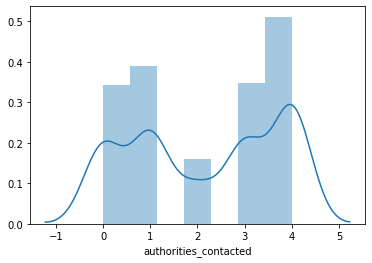

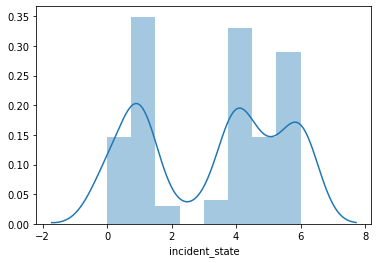

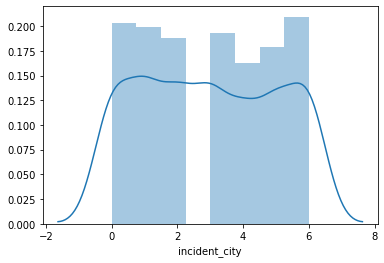

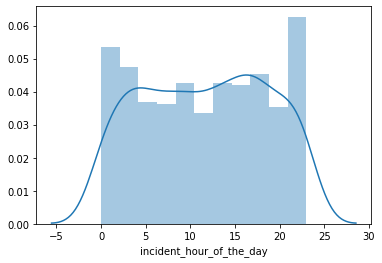

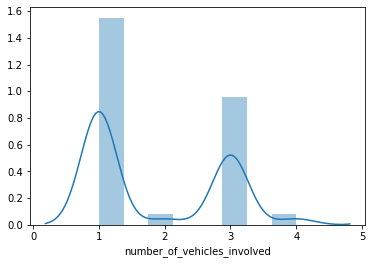

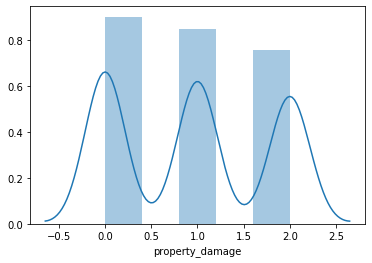

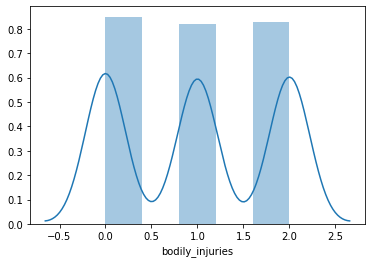

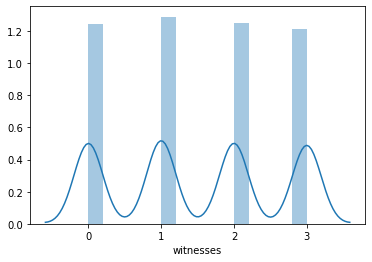

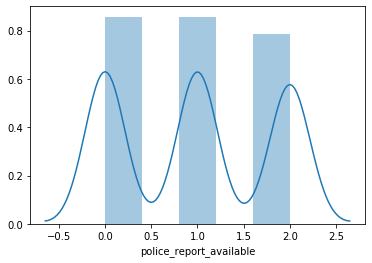

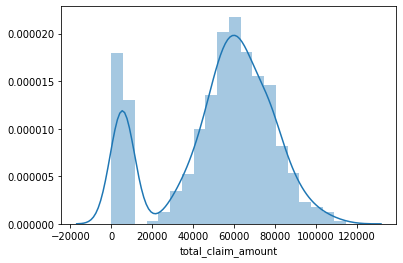

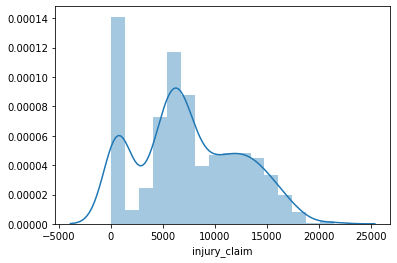

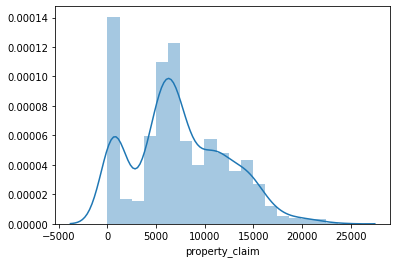

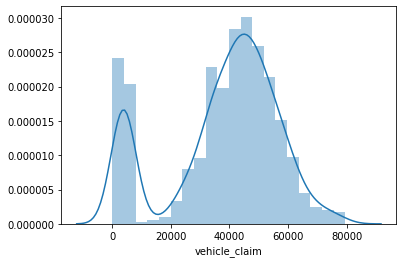

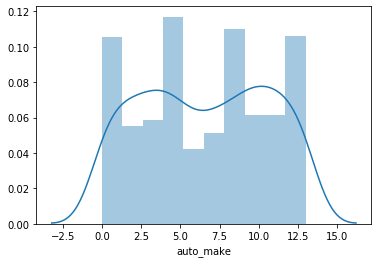

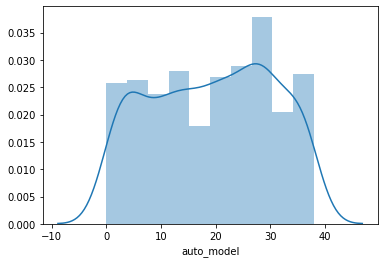

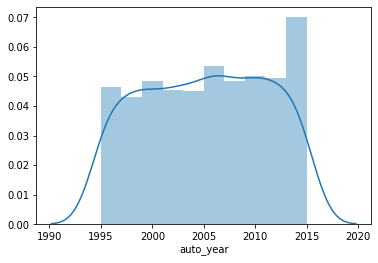

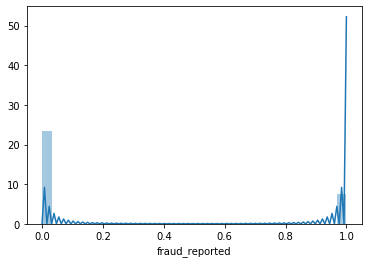

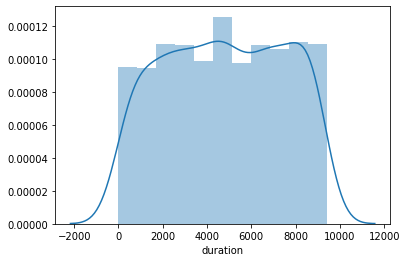

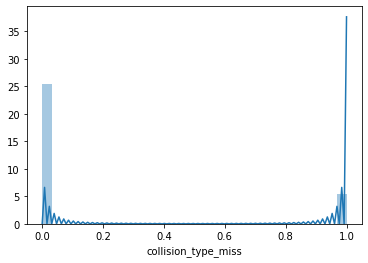

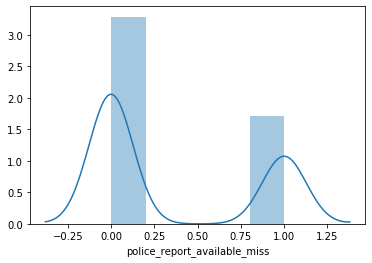

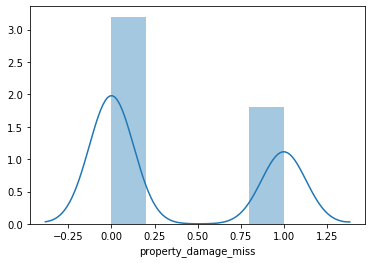

In [171]:
# lets make distplot
cols=fraud.columns.values
for i in cols:
    plt.subplots()
    sns.distplot(fraud[i])

In [172]:
fraud.skew()

months_as_customer              0.362177
age                             0.478988
policy_state                   -0.026177
policy_csl                      0.088928
policy_deductable               0.477887
policy_annual_premium           0.004402
umbrella_limit                  1.806712
insured_zip                     0.816554
insured_sex                     0.148630
insured_education_level        -0.000148
insured_occupation             -0.058881
insured_hobbies                -0.061563
insured_relationship            0.077488
capital-gains                   0.478850
capital-loss                   -0.391472
incident_type                   0.101507
collision_type                 -0.193345
incident_severity               0.279016
authorities_contacted          -0.121744
incident_state                 -0.148865
incident_city                   0.049531
incident_hour_of_the_day       -0.035584
number_of_vehicles_involved     0.502664
property_damage                 0.106418
bodily_injuries 

In [173]:
# umbrella_limit,insured_zip,total_claim_amount,vehicle_claim

# collision_type_miss,police_report_available_miss,property_damage_miss

In [174]:
fraud.corr()

months_as_customer       age  policy_state  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  insured_sex  insured_education_level  insured_occupation  insured_hobbies  insured_relationship  capital-gains  capital-loss  incident_type  collision_type  incident_severity  authorities_contacted  incident_state  incident_city  incident_hour_of_the_day  number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  police_report_available  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  auto_model  auto_year  fraud_reported  duration  collision_type_miss  police_report_available_miss  property_damage_miss
months_as_customer                      1.000000  0.922098     -0.000328   -0.026819           0.026807               0.005018        0.015498     0.017895     0.060925                -0.000833            0.009814        -0.093661              0.069727       0.006399      0.020209      -0.017377       -0.017824          -0.059581               0.010021        0.005369      -0.000130                  0.070639                     0.014736         0.007040        -0.010162   0.058383                 0.017647            0.062108      0.065329        0.034940       0.061013   0.047655    0.004202  -0.000292        0.020544  0.048603            -0.044463                     -0.051763             -0.006653
age                                     0.922098  1.000000     -0.014533   -0.015185           0.029188               0.014404        0.018126     0.025604     0.073337                 0.000969            0.017220        -0.081315              0.074832      -0.007075      0.007368      -0.025626       -0.018672          -0.058439               0.015417        0.005770      -0.002291                  0.087161                     0.022102        -0.001486        -0.015679   0.052359                 0.014661            0.069863      0.075522        0.060898       0.062588   0.030410    0.017343   0.001354        0.012143  0.037404            -0.045999                     -0.045002             -0.000748
policy_state                           -0.000328 -0.014533      1.000000    0.001027           0.010033               0.012455       -0.029580     0.008777    -0.020481                -0.034327           -0.031215        -0.038689             -0.018506       0.074551     -0.030338       0.031848        0.034739          -0.026377              -0.016777        0.008723      -0.002077                  0.029457                    -0.042263         0.008623         0.013384   0.022960                 0.071950           -0.006002     -0.046290        0.008406       0.001425   0.017124   -0.025253   0.002114        0.029432  0.005445             0.001599                     -0.055297             -0.022676
policy_csl                             -0.026819 -0.015185      0.001027    1.000000           0.003384               0.023978        0.021636     0.006879    -0.010757                 0.009153            0.015788        -0.005960             -0.030063       0.005249     -0.034612       0.011997       -0.036687           0.022530               0.056182        0.032814       0.009333                 -0.001869                    -0.019403        -0.027340        -0.000595   0.071500                 0.002424           -0.055758     -0.078818       -0.042216      -0.046791  -0.004701    0.047885  -0.033082       -0.037190  0.017624             0.070621                     -0.005745              0.019794
policy_deductable                       0.026807  0.029188      0.010033    0.003384           1.000000              -0.003245        0.010870     0.004545    -0.009733                 0.015217           -0.046733         0.004061             -0.022945       0.035212     -0.023544      -0.038411       -0.033182          -0.015711              -0.000760        0.006517      -0.045117                  0.060935                     0.051214         0.016900        -0.022765   0.066639

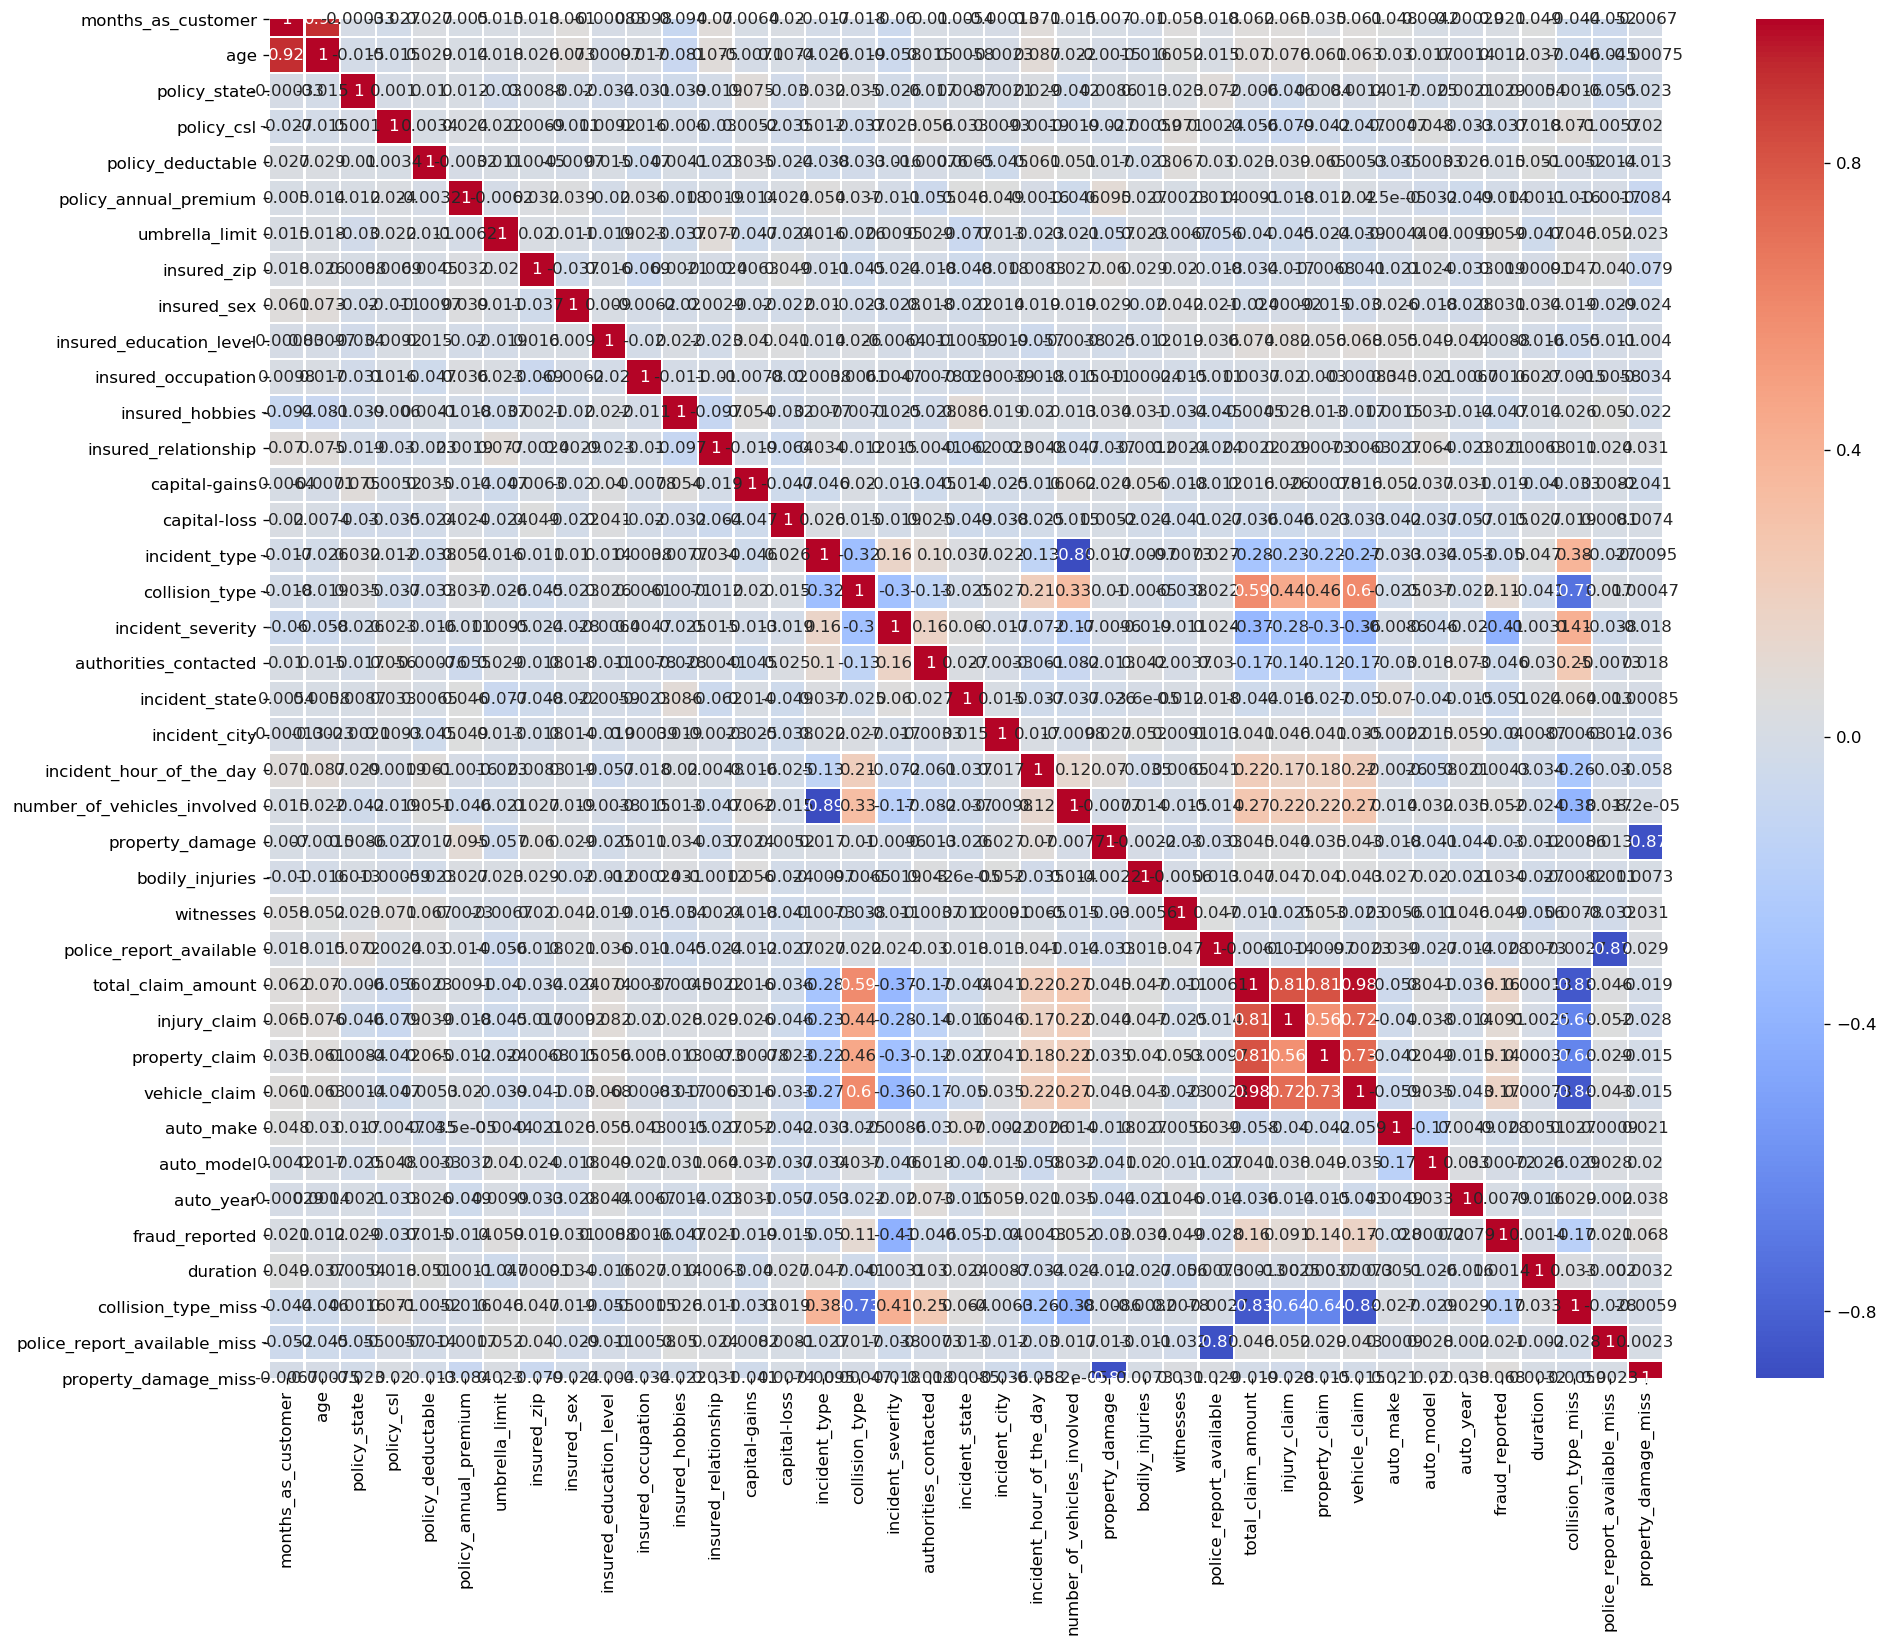

In [181]:
plt.figure(figsize=(20,15),dpi=120)
sns.heatmap(fraud.corr(),annot=True,cmap='coolwarm',linewidths=0.8,square=True)

In [182]:
# +ve corr:

# age and (months_as_customer)
# total_claim_amount and (vehicle_claim),property_claim,injury_claim

# -ve corr:
# police_report_available_miss and police_report_available
# property_damage and property_damage_miss
# total_claim_amount and collision_type_miss
# vehicle_claim and collision_type_miss
# number_of_vehicles_involved and incident_type

# Outliers

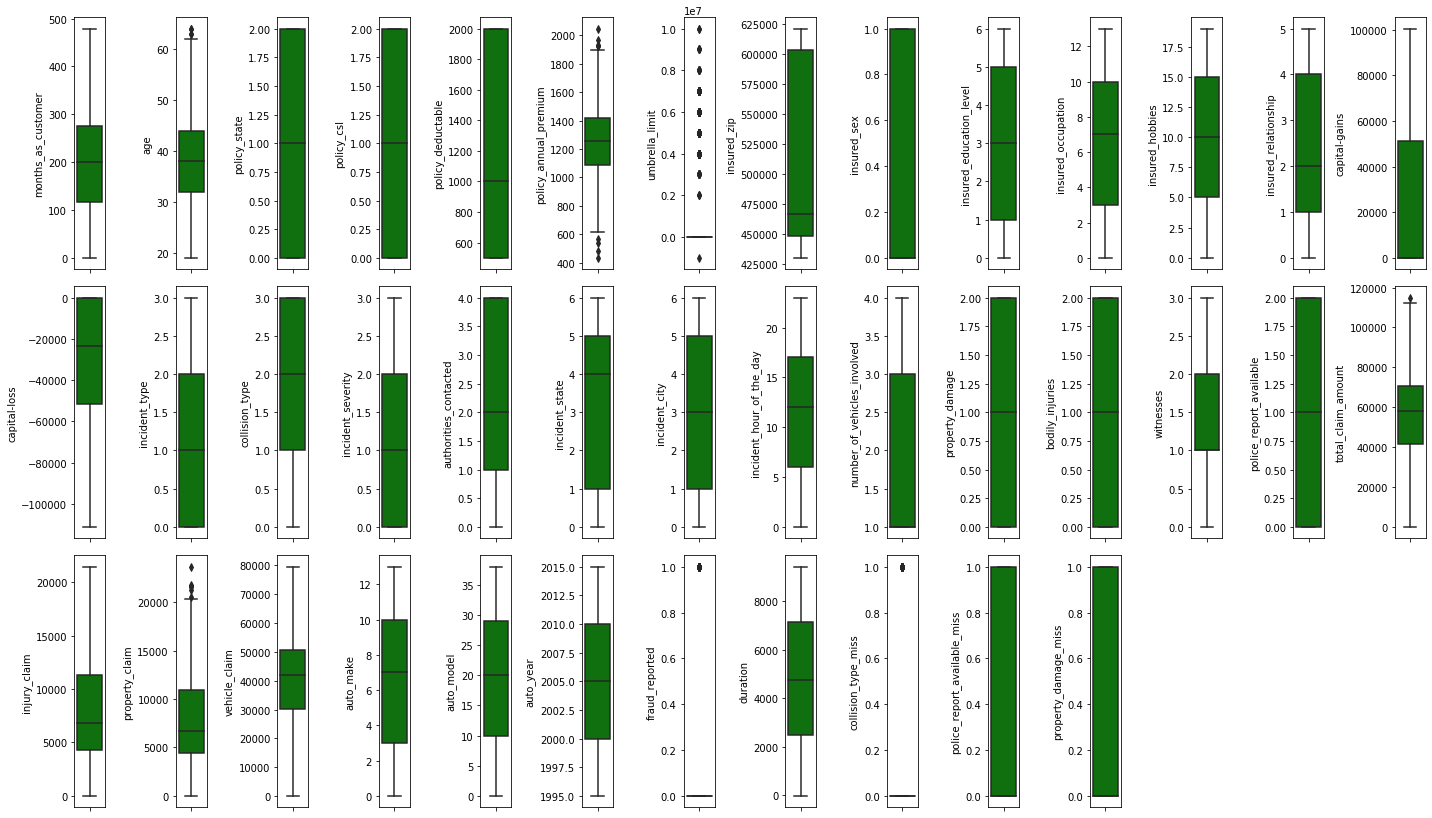

In [186]:
plt.figure(figsize=(20,60))
for i in range(len(cols)):
    plt.subplot(16,14,i+1)
    sns.boxplot(fraud[cols[i]], color='green', orient='v')
    plt.tight_layout()

In [187]:
# age,policy_annual_premium,umbrella_limit,total_claim_amount,property_claim

# collision_type_miss

In [188]:
from scipy.stats import zscore
z=np.abs(zscore(fraud))
len(np.where(z>3)[0])

20

In [189]:
# there are 20 outliers

In [190]:
# using IQR method
def outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out=(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return(df_out.sum())

def lower(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower=Q1 - 1.5 * IQR
    return lower

def upper(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper=Q3 + 1.5 * IQR
    return upper

def treat_outlier(df,col):
    for i in range(df.shape[0]):
        if (df[col].iloc[i])>upper(df,col):
            df[col].iloc[i]=upper(df,col)
        elif (df[col].iloc[i])<lower(df,col):
            df[col].iloc[i]=lower(df,col)
            
def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return (df.shape)

In [191]:
outlier(fraud)

months_as_customer                0
age                               4
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             9
umbrella_limit                  202
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries                   0
witnesses                         0
police_report_available           0
total_claim_amount          

In [192]:
fraudz=fraud.copy()
fraudz=fraudz[(z<3).all(axis=1)]
fraudz.shape

(980, 39)

In [193]:
outlier(fraudz)

months_as_customer                0
age                               4
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             6
umbrella_limit                  187
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries                   0
witnesses                         0
police_report_available           0
total_claim_amount          

In [194]:
fraudz_iqr=fraudz.copy()

In [196]:
treat_outlier(fraudz_iqr,'age')
treat_outlier(fraudz_iqr,'policy_annual_premium')
treat_outlier(fraudz_iqr,'total_claim_amount')
treat_outlier(fraudz_iqr,'property_claim')

In [197]:
outlier(fraudz_iqr)

months_as_customer                0
age                               0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                  187
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries                   0
witnesses                         0
police_report_available           0
total_claim_amount          

In [198]:
# lets further create a copy and drop outliers of umbrella
fraudz_iqr_2=fraudz_iqr.copy()

In [199]:
treat_outlier(fraudz_iqr_2,'umbrella_limit')

In [200]:
outlier(fraudz_iqr_2)

months_as_customer                0
age                               0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries                   0
witnesses                         0
police_report_available           0
total_claim_amount          

In [202]:
# we created 3 cases of outlier removal

# Definitions

In [203]:
# this is a classification problem with 2 classes

In [204]:
# lets seperate x and y

In [205]:
# zscore outlier removal

x=fraudz.drop('fraud_reported',axis=1)
y=fraudz['fraud_reported']

In [206]:
# iqr outlier treatment

x1=fraudz_iqr.drop('fraud_reported',axis=1)
y1=fraudz_iqr['fraud_reported']

In [207]:
# further iqr outlier treatment

x2=fraudz_iqr_2.drop('fraud_reported',axis=1)
y2=fraudz_iqr_2['fraud_reported']

In [210]:
# y, y1 and y2 are all the same

In [385]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,f1_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
from sklearn.metrics import roc_curve, roc_auc_score

In [319]:
# Now, let's define some functions to reuse them
def fitc(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    
def get_scorec(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(pred,y_test)
    f=f1_score(pred,y_test)
    return train_score,acc,f

def get_predc(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    return pred

def get_metricsc(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(pred,y_test)
    conf=confusion_matrix(pred,y_test)
    clas=classification_report(pred,y_test)
    f1=f1_score(y_test,pred)
    recall=f1_score(pred,y_test)
    precision=f1_score(pred,y_test)
    return acc,f1,recall,precision,conf,clas

from sklearn.model_selection import GridSearchCV
def gridcvc(m,p,x,y):
    gkb=GridSearchCV(m,p,n_jobs=-1,cv=4,verbose=5,scoring='accuracy')
    gkb.fit(x,y)
    return gkb.best_params_


from sklearn.model_selection import RandomizedSearchCV
def randomcvc(m,p,x,y):
    from sklearn.model_selection import RandomizedSearchCV
    gkb=RandomizedSearchCV(estimator=m,param_distributions=p,
                          cv=4,n_iter=100,
                          n_jobs=-1, verbose=5,return_train_score=True,random_state=45)
    gkb.fit(x,y)
    return gkb.best_params_

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
def bfec(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    return xbfe

def ffsc(m,x,y,k):
    sf=sfs(m, k_features=k, forward=True, cv=4, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xffs=x[feat_names]
    return xffs

from sklearn.decomposition import PCA
def nforpcac(x):
    pca=PCA().fit(x)
    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
    plt.xlabel('No of Components')
    plt.ylabel('Variance')
    plt.axhline(y=95, color='r', linestyle='--')
    plt.show()
    
def pcac(m,x,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    return xpca

def crossc(m,x,y,c=5):
    score=cross_val_score(m,x,y,cv=c,n_jobs=-1)
    return (score.mean(), score.std())

from sklearn.preprocessing import StandardScaler
def stdc(x):
    scx=StandardScaler()
    xs=pd.DataFrame(scx.fit_transform(x), columns=x.columns)
    return xs

from sklearn.preprocessing import MinMaxScaler
def mmc(x):
    mm=MinMaxScaler()
    xm=pd.DataFrame(mm.fit_transform(x), columns=x.columns)
    return xm

def modified_bfec(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    x_train, x_test, y_train, y_test=train_test_split(xbfe,y,test_size=0.25,random_state=45,stratify=y)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(pred,y_test)
    f=f1_score(pred,y_test)
    return train_score,acc,f

def modified_ffsc(m,x,y,k):
    sf=sfs(m, k_features=k, forward=True, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xffs=x[feat_names]
    x_train, x_test, y_train, y_test=train_test_split(xffs,y,test_size=0.25,random_state=45,stratify=y)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(pred,y_test)
    f=f1_score(pred,y_test)
    return train_score,acc,f

def modified_pcac(m,x,y,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    x_train, x_test, y_train, y_test=train_test_split(xpca,y,test_size=0.25,random_state=45,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(pred,y_test)
    f=f1_score(pred,y_test)
    return acc,f

def ttsc(x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    return x_train, x_test, y_train, y_test

def classification(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    clas=classification_report(pred,y_test)
    return clas

In [213]:
lrc=LogisticRegression(n_jobs=-1,random_state=45)
gnb=GaussianNB()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(random_state=45)
svc=SVC(random_state=45)
knnc=KNeighborsClassifier(n_jobs=-1)
rfc=RandomForestClassifier(n_jobs=-1,random_state=45)
gbc=GradientBoostingClassifier(random_state=45)
xgbc=XGBClassifier(n_jobs=-1,random_state=45)
adac=AdaBoostClassifier(random_state=45)

# Iteration A

In [215]:
print("LR ", get_scorec(lrc,x,y))
print("DT ", get_scorec(dtc,x,y))
print("SVC ", get_scorec(svc,x,y))
print("KNN ", get_scorec(knnc,x,y))
print("GNB ", get_scorec(gnb,x,y))
# print("MNB ", get_scorec(mnb,x,y))
print("RF ", get_scorec(rfc,x,y))
print("GB ", get_scorec(gbc,x,y))
print("XGB ", get_scorec(xgbc,x,y))

LR  (0.7551020408163265, 0.7551020408163265, 0.0)
DT  (1.0, 0.8040816326530612, 0.5862068965517241)
SVC  (1.0, 0.7551020408163265, 0.0)
KNN  (0.7687074829931972, 0.7061224489795919, 0.23404255319148937)
GNB  (0.6693877551020408, 0.6775510204081633, 0.23300970873786406)
RF  (0.9727891156462585, 0.7714285714285715, 0.36363636363636365)
GB  (0.9823129251700681, 0.8448979591836735, 0.6607142857142857)
XGB  (1.0, 0.8489795918367347, 0.6666666666666666)


# Iteration B

In [216]:
print("LR ", get_scorec(lrc,x2,y))
print("DT ", get_scorec(dtc,x2,y))
print("SVC ", get_scorec(svc,x2,y))
print("KNN ", get_scorec(knnc,x2,y))
print("GNB ", get_scorec(gnb,x2,y))
# print("MNB ", get_scorec(mnb,x,y))
print("RF ", get_scorec(rfc,x2,y))
print("GB ", get_scorec(gbc,x2,y))
print("XGB ", get_scorec(xgbc,x2,y))

LR  (0.7551020408163265, 0.7551020408163265, 0.0)
DT  (1.0, 0.8040816326530612, 0.5932203389830508)
SVC  (1.0, 0.7551020408163265, 0.0)
KNN  (0.7768707482993197, 0.6857142857142857, 0.15384615384615385)
GNB  (0.672108843537415, 0.6938775510204082, 0.358974358974359)
RF  (0.9782312925170068, 0.7959183673469388, 0.41860465116279066)
GB  (0.9768707482993197, 0.8408163265306122, 0.6666666666666667)
XGB  (1.0, 0.8489795918367347, 0.6666666666666666)


# Iteration C

In [217]:
print("LR ", get_scorec(lrc,x1,y))
print("DT ", get_scorec(dtc,x1,y))
print("SVC ", get_scorec(svc,x1,y))
print("KNN ", get_scorec(knnc,x1,y))
print("GNB ", get_scorec(gnb,x1,y))
# print("MNB ", get_scorec(mnb,x,y))
print("RF ", get_scorec(rfc,x1,y))
print("GB ", get_scorec(gbc,x1,y))
print("XGB ", get_scorec(xgbc,x1,y))

LR  (0.7551020408163265, 0.7551020408163265, 0.0)
DT  (1.0, 0.8122448979591836, 0.5964912280701755)
SVC  (1.0, 0.7551020408163265, 0.0)
KNN  (0.7687074829931972, 0.7061224489795919, 0.23404255319148937)
GNB  (0.6693877551020408, 0.6775510204081633, 0.23300970873786406)
RF  (0.9727891156462585, 0.7714285714285715, 0.36363636363636365)
GB  (0.9768707482993197, 0.8489795918367347, 0.6782608695652174)
XGB  (1.0, 0.8489795918367347, 0.6666666666666666)


In [219]:
# lr with x
# DT with x1
# svc with x
# KNN with x1
# gnb with x2
# rf with x2
# gb with x1
# xgb with x

In [220]:
# lets scale the data
xs=stdc(x)
x1s=stdc(x1)
x2s=stdc(x2)

# Iteration D

In [221]:
print("LR ", get_scorec(lrc,xs,y))
print("DT ", get_scorec(dtc,x1s,y))
print("SVC ", get_scorec(svc,xs,y))
print("KNN ", get_scorec(knnc,x1s,y))
print("GNB ", get_scorec(gnb,x2s,y))
# print("MNB ", get_scorec(mnb,x,y))
print("RF ", get_scorec(rfc,x2s,y))
print("GB ", get_scorec(gbc,x1s,y))
print("XGB ", get_scorec(xgbc,xs,y))

LR  (0.8013605442176871, 0.7959183673469388, 0.4791666666666667)
DT  (1.0, 0.8122448979591836, 0.5964912280701755)
SVC  (0.8517006802721089, 0.7591836734693878, 0.06349206349206349)
KNN  (0.8, 0.746938775510204, 0.29545454545454547)
GNB  (0.6625850340136055, 0.6693877551020408, 0.5207100591715977)
RF  (0.9782312925170068, 0.7918367346938775, 0.4)
GB  (0.9768707482993197, 0.8489795918367347, 0.6782608695652174)
XGB  (1.0, 0.8489795918367347, 0.6666666666666666)


# Conclusion

In [222]:
# we'll build 
# DT with x1 1.0, 0.8122448979591836, 0.5964912280701755
# gb with x1 0.9768707482993197, 0.8489795918367347, 0.6782608695652174

# DecisionTree

In [223]:
# DT with x1 1.0, 0.8122448979591836, 0.5964912280701755

In [224]:
# dtc=DecisionTreeClassifier(random_state=45)

In [225]:
# Individual Model Pipeline:
# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [226]:
# lets use feat selection using corr

In [227]:
x1corr=x1.drop(['age','total_claim_amount'],axis=1)

In [229]:
get_scorec(dtc,x1corr,y)

(1.0, 0.7918367346938775, 0.5785123966942148)

In [230]:
# the score reduced

In [231]:
x1.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year', 'duration', 'collision_type_miss', 'police_report_available_miss', 'property_damage_miss'], dtype='object')

In [232]:
x1corr1=x1.drop(['collision_type_miss','police_report_available_miss','property_damage_miss'],axis=1)
get_scorec(dtc,x1corr1,y)

(1.0, 0.7918367346938775, 0.5714285714285714)

In [233]:
# score reduced

In [234]:
x1corr2=x1.drop(['collision_type','police_report_available','property_damage'],axis=1)
get_scorec(dtc,x1corr2,y)

(1.0, 0.8367346938775511, 0.6551724137931035)

In [235]:
# the score improved

In [236]:
# lets drop duration from x1corr2
x1corr3=x1corr2.drop('duration',axis=1)
get_scorec(dtc,x1corr3,y)

(1.0, 0.8, 0.5663716814159292)

In [237]:
# score reduced

In [239]:
# lets apply bfe on x1corr2
# there are 35 features
modified_bfec(dtc,x1corr2,y,34)

(1.0, 0.8, 0.5585585585585585)

In [240]:
modified_bfec(dtc,x1corr2,y,33)

(1.0, 0.7918367346938775, 0.5486725663716815)

In [241]:
modified_bfec(dtc,x1corr2,y,32)

(1.0, 0.7836734693877551, 0.5391304347826087)

In [242]:
modified_bfec(dtc,x1corr2,y,31)

(1.0, 0.8122448979591836, 0.5892857142857143)

In [243]:
modified_bfec(dtc,x1corr2,y,30)

(1.0, 0.8040816326530612, 0.5789473684210527)

In [248]:
modified_bfec(dtc,x1corr2,y,25)

(1.0, 0.7959183673469388, 0.5614035087719299)

In [249]:
modified_bfec(dtc,x1corr2,y,20)

(1.0, 0.8367346938775511, 0.6666666666666666)

In [250]:
for i in range(15,23):
    print(i," ",modified_bfec(dtc,x1corr2,y,i))

15   (1.0, 0.7877551020408163, 0.5517241379310344)
16   (1.0, 0.8448979591836735, 0.6666666666666667)
17   (1.0, 0.8122448979591836, 0.6166666666666667)
18   (1.0, 0.8326530612244898, 0.6719999999999999)
19   (1.0, 0.8204081632653061, 0.6140350877192983)
20   (1.0, 0.8367346938775511, 0.6666666666666666)
21   (1.0, 0.8244897959183674, 0.6386554621848739)
22   (1.0, 0.8040816326530612, 0.6129032258064516)


In [251]:
# best score at k=16 but f1_score best at k=18

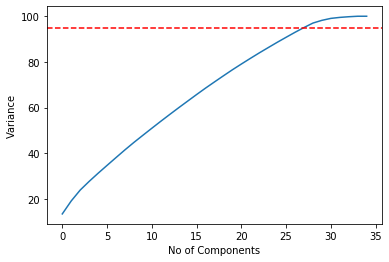

In [304]:
# lets apply pca
x1c2std=stdc(x1corr2)
nforpcac(x1c2std)

In [305]:

for i in range(25,36):
    print(i," ",modified_pcac(dtc,x1c2std,y,i))

25   (0.6448979591836734, 0.28099173553719003)
26   (0.6693877551020408, 0.2956521739130435)
27   (0.6612244897959184, 0.2782608695652174)
28   (0.6653061224489796, 0.24074074074074076)
29   (0.6857142857142857, 0.3739837398373984)
30   (0.6857142857142857, 0.3739837398373984)
31   (0.6693877551020408, 0.36220472440944884)
32   (0.6857142857142857, 0.3529411764705882)
33   (0.6653061224489796, 0.3387096774193548)
34   (0.6530612244897959, 0.34108527131782945)
35   (0.6693877551020408, 0.3076923076923077)


In [254]:
# we'll go with bfe

In [255]:
x1cb1=bfec(dtc,x1corr2,y,16)

In [256]:
x1cb2=bfec(dtc,x1corr2,y,18)

In [260]:
# lets compare both with classification report
acc,f1,recall,precision,conf,clas=(get_metricsc(dtc,x1cb1,y))
print(acc)
print(f1)
print(recall)
print(precision)
print(conf)
print(clas)

0.7836734693877551
0.5309734513274337
0.5309734513274337
0.5309734513274337
[[162  30]
 [ 23  30]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       192
           1       0.50      0.57      0.53        53

    accuracy                           0.78       245
   macro avg       0.69      0.70      0.70       245
weighted avg       0.79      0.78      0.79       245



In [261]:

acc,f1,recall,precision,conf,clas=(get_metricsc(dtc,x1cb2,y))
print(acc)
print(f1)
print(recall)
print(precision)
print(conf)
print(clas)

0.8
0.5811965811965812
0.5811965811965812
0.5811965811965812
[[162  26]
 [ 23  34]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       188
           1       0.57      0.60      0.58        57

    accuracy                           0.80       245
   macro avg       0.72      0.73      0.72       245
weighted avg       0.80      0.80      0.80       245



In [262]:
# x1cb2 is better

In [263]:
# lets tune dtc,x1cb2,y

In [267]:
DecisionTreeClassifier?

In [265]:
param_dtc={'criterion':['gini','entropy'],'splitter':['best','random'],'max_features':['auto','sqrt','log2',None],
          'presort':[True,False]}
gridcvc(dtc,param_dtc,x1cb2,y)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    4.3s finished


{'criterion': 'gini',
 'max_features': None,
 'presort': True,
 'splitter': 'best'}

In [266]:
dtc1=DecisionTreeClassifier(random_state=45,criterion= 'gini',
 max_features= None,
 presort= True,
 splitter= 'best')

In [268]:
param_dtc1={'max_depth':[2,4,8,12,16],'min_samples_split':[2,4,8,12,16],'min_samples_leaf':[1,4,8,12,16]}
gridcvc(dtc1,param_dtc1,x1cb2,y)

Fitting 4 folds for each of 125 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished


{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 16}

In [270]:
param_dtc2={'max_depth':[2,3,4,5,6,7],'min_samples_split':[13,14,15,16,17],'min_samples_leaf':[2,3,4,5,6,7]}
gridcvc(dtc1,param_dtc2,x1cb2,y)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    2.4s finished


{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 13}

In [271]:
dtc2=DecisionTreeClassifier(random_state=45,criterion= 'gini',
 max_features= None,
 presort= True,
 splitter= 'best', max_depth= 3, min_samples_leaf= 2, min_samples_split= 13)

In [272]:
get_scorec(dtc2,x1cb2,y)

(0.8598639455782313, 0.8938775510204081, 0.8)

In [273]:
# the score improved significantly

In [287]:
# lets boost dtc2,x1cb2,y
adadtc=AdaBoostClassifier(base_estimator=dtc2, learning_rate=0.0001, n_estimators=50, random_state=45)
get_scorec(adadtc,x1cb2,y)

(0.8598639455782313, 0.8938775510204081, 0.8)

In [377]:
# lets cross validate dtc2,x1cb2,y
for i in range(2,19):
    print(i," ",crossc(dtc2,x1cb2,y,i))

2   (0.8510204081632653, 0.020408163265306145)
3   (0.8357347892159622, 0.016061911378965024)
4   (0.8530612244897959, 0.004998958658741149)
5   (0.8489795918367348, 0.024911337991293286)
6   (0.8459212429547609, 0.015571258886662784)
7   (0.8541066235157769, 0.008820790280813685)
8   (0.8561408769825403, 0.012654530510527864)
9   (0.8520824967308147, 0.022434895835654358)
10   (0.846938775510204, 0.025407958363242306)
11   (0.8470140629997627, 0.029952560408379285)
12   (0.8419276322392854, 0.03362540980371264)
13   (0.8449611554874713, 0.03012989474268991)
14   (0.8469583546829631, 0.02772933413018303)
15   (0.846899766899767, 0.03547907047797653)
16   (0.8449894235854045, 0.03745404551457139)
17   (0.84502843556445, 0.03597619882695895)
18   (0.8449007268451711, 0.03636547269253504)


In [291]:
# no over fitting or under fitting

In [292]:
# Evaluation metrics

acc,f1,recall,precision,conf,clas=(get_metricsc(dtc2,x1cb2,y))
print(acc)
print(f1)
print(recall)
print(precision)
print(conf)
print(clas)

0.8938775510204081
0.8
0.8
0.8
[[167   8]
 [ 18  52]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       175
           1       0.87      0.74      0.80        70

    accuracy                           0.89       245
   macro avg       0.88      0.85      0.86       245
weighted avg       0.89      0.89      0.89       245



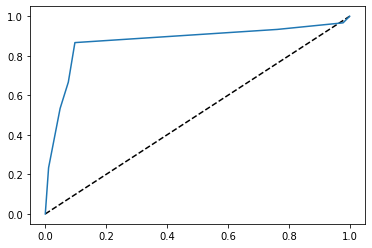

In [386]:
xtr,xte,ytr,yte=ttsc(x1cb2,y)
y_pred_pro=dtc2.predict_proba(xte)[:,1]
fpr,tpr,threshold=roc_curve(yte,y_pred_pro)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr,label='DTC')
plt.show()

In [387]:
roc_auc_score(yte,y_pred_pro)

0.8736036036036036

# GradientBoosting

In [293]:
# gb with x1 0.9768707482993197, 0.8489795918367347, 0.6782608695652174

In [294]:
# gbc=GradientBoostingClassifier(random_state=45)

In [295]:
# Individual Model Pipeline:
# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [296]:
# lets use feat selection using corr
x1corrgb=x1.drop(['age','total_claim_amount'],axis=1)
get_scorec(gbc,x1corrgb,y)

(0.9782312925170068, 0.8448979591836735, 0.6666666666666667)

In [297]:
# score reduced

In [298]:
x1corrgb1=x1.drop(['collision_type_miss','police_report_available_miss','property_damage_miss'],axis=1)
get_scorec(gbc,x1corrgb1,y)

(0.9768707482993197, 0.8408163265306122, 0.6666666666666667)

In [299]:
# reduced

In [302]:
x1corrgb2=x1.drop(['collision_type','police_report_available','property_damage','duration'],axis=1)
get_scorec(gbc,x1corrgb2,y)

(0.9795918367346939, 0.8326530612244898, 0.6434782608695652)

In [301]:
# reduced

In [315]:
modified_bfec(gbc,x1,y,34)

(0.9782312925170068, 0.8408163265306122, 0.6548672566371682)

In [318]:
# lets apply bfe on x1
modified_bfec(gbc,x1,y,33)

(0.9782312925170068, 0.8653061224489796, 0.7226890756302521)

In [312]:
modified_bfec(gbc,x1,y,32)

(0.9755102040816327, 0.8571428571428571, 0.7008547008547009)

In [313]:
modified_bfec(gbc,x1,y,31)

(0.9755102040816327, 0.8571428571428571, 0.7008547008547009)

In [307]:
modified_bfec(gbc,x1,y,30)

(0.9755102040816327, 0.8571428571428571, 0.7008547008547009)

In [314]:
modified_bfec(gbc,x1,y,27)

(0.9755102040816327, 0.8571428571428571, 0.7008547008547009)

In [308]:
modified_bfec(gbc,x1,y,25)

(0.9687074829931973, 0.8571428571428571, 0.7008547008547009)

In [309]:
modified_bfec(gbc,x1,y,20)

(0.9768707482993197, 0.8530612244897959, 0.6785714285714285)

In [310]:
modified_bfec(gbc,x1,y,15)

(0.9741496598639455, 0.8571428571428571, 0.7058823529411764)

In [311]:
modified_bfec(gbc,x1,y,17)

(0.9727891156462585, 0.8489795918367347, 0.6666666666666666)

In [320]:
# best score at k=33
x1b=bfec(gbc,x1,y,33)
x1b.head(1)

months_as_customer   age  policy_state  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  insured_sex  insured_education_level  insured_occupation  insured_hobbies  insured_relationship  capital-loss  incident_type  collision_type  incident_severity  authorities_contacted  incident_state  incident_city  incident_hour_of_the_day  number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_model  collision_type_miss  police_report_available_miss  property_damage_miss
0                 328  48.0             2           1               1000                1406.91               0       466132            1                        4                   2               17                     0             0              2               3                  0                      4               4              1                         5                            1                2                1          2             71610.0          6510         13020.0          52080           1                    0                             0                     0

In [321]:
get_scorec(gbc,x1b,y)

(0.9782312925170068, 0.8653061224489796, 0.7226890756302521)

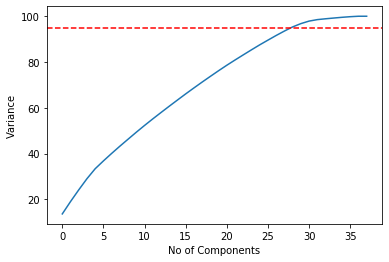

In [323]:
# lets apply pca
x1s=stdc(x1)
nforpcac(x1s)

In [324]:

for i in range(20,36):
    print(i," ",modified_pcac(gbc,x1s,y,i))

20   (0.7714285714285715, 0.3170731707317074)
21   (0.7714285714285715, 0.3)
22   (0.763265306122449, 0.2564102564102564)
23   (0.7714285714285715, 0.3170731707317074)
24   (0.7510204081632653, 0.2278481012658228)
25   (0.7673469387755102, 0.27848101265822783)
26   (0.7836734693877551, 0.3614457831325301)
27   (0.7795918367346939, 0.34146341463414637)
28   (0.7755102040816326, 0.32098765432098764)
29   (0.7755102040816326, 0.38202247191011235)
30   (0.7755102040816326, 0.3373493975903614)
31   (0.7591836734693878, 0.33707865168539325)
32   (0.726530612244898, 0.26373626373626374)
33   (0.7306122448979592, 0.26666666666666666)
34   (0.7551020408163265, 0.28571428571428575)
35   (0.746938775510204, 0.29545454545454547)


In [325]:
# lets tune gbc,x1b,y

In [326]:
GradientBoostingClassifier?

In [327]:
param_gb={'loss':['deviance','exponential'],'criterion':['friedman_mse','mse','mae'],'max_features':['auto','sqrt','log2',None],
         'warm_start':[True,False]}
gridcvc(gbc,param_gb,x1b,y)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:  1.7min finished


{'criterion': 'friedman_mse',
 'loss': 'deviance',
 'max_features': 'auto',
 'warm_start': True}

In [328]:
gbc1=GradientBoostingClassifier(random_state=45,criterion= 'friedman_mse',
 loss= 'deviance',
 max_features= 'auto',
 warm_start= True)

In [329]:
param_gb2={'learning_rate':[0.001,0.01,0.1,1],'min_samples_split':[2,4,8,12],'min_samples_leaf':[1,2,4,8,12],
         'max_depth':[3,5,8,12]}
gridcvc(gbc1,param_gb2,x1b,y)

Fitting 4 folds for each of 320 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:  4.0min finished


{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [330]:
param_gb3={'learning_rate':[0.1,0.2,0.4,0.6,0.8],'min_samples_split':[3,4,5,6,7,9],'min_samples_leaf':[1,2,3,5],
         'max_depth':[2,3,4,6,7]}
gridcvc(gbc1,param_gb3,x1b,y)

Fitting 4 folds for each of 600 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2170 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  5.5min finished


{'learning_rate': 0.2,
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 7}

In [331]:
param_gb4={'learning_rate':[0.2,0.3],'min_samples_split':[5,6,7],'min_samples_leaf':[2,3],
         'max_depth':[2,3,4]}
gridcvc(gbc1,param_gb4,x1b,y)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   11.8s finished


{'learning_rate': 0.2,
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 7}

In [332]:
gbc2=GradientBoostingClassifier(random_state=45,criterion= 'friedman_mse',
 loss= 'deviance',
 max_features= 'auto',
 warm_start= True,learning_rate= 0.2,
 max_depth= 3,
 min_samples_leaf= 3,
 min_samples_split= 7)
get_scorec(gbc2,x1b,y)

(0.9972789115646259, 0.8530612244897959, 0.6842105263157895)

In [333]:
# the score reduced

In [359]:
gbc3=GradientBoostingClassifier(random_state=45,learning_rate= 0.3,
 max_depth= 3,
 min_samples_leaf= 3,
 min_samples_split= 8)
get_scorec(gbc3,x1b,y)

(1.0, 0.8693877551020408, 0.7377049180327869)

In [369]:
param_gb5={'n_estimators':range(10,160,10)}
gridcvc(gbc3,param_gb5,x1b,y)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.0s finished


{'n_estimators': 70}

In [370]:
gbc4=GradientBoostingClassifier(random_state=45,learning_rate= 0.3,
 max_depth= 3,
 min_samples_leaf= 3,
 min_samples_split= 8,n_estimators= 70)
get_scorec(gbc4,x1b,y)

(0.9959183673469387, 0.8775510204081632, 0.7540983606557377)

In [360]:
# the score improved a little

In [376]:
# lets boost gbc4,x1b,y
adagbc=AdaBoostClassifier(base_estimator=gbc4, learning_rate=0.1, n_estimators=70, random_state=45)
get_scorec(adagbc,x1b,y)

(1.0, 0.8612244897959184, 0.711864406779661)

In [367]:
# the score didn't improve

In [379]:
# lets cross validate gbc4,x1b,y
for i in range(2,20):
    print(i," ",crossc(gbc4,x1b,y,i))

2   (0.823469387755102, 0.0071428571428571175)
3   (0.8020643765282703, 0.01851824974351388)
4   (0.8408163265306122, 0.016069403824513894)
5   (0.8316326530612244, 0.017376924863190236)
6   (0.8204773305401766, 0.03802793177752724)
7   (0.8266421339697674, 0.022248208447572727)
8   (0.8163984406237506, 0.025332791328852505)
9   (0.8276451226502195, 0.0375627585662203)
10   (0.823469387755102, 0.021428571428571432)
11   (0.8143482836536975, 0.03929510493875713)
12   (0.8103106494027905, 0.02691313335120804)
13   (0.815459751249225, 0.04389023693596344)
14   (0.8164319248826291, 0.04844783894638245)
15   (0.8174980574980577, 0.04361914889872107)
16   (0.8206140930724484, 0.047390714629473356)
17   (0.8184979242550631, 0.04151855163565849)
18   (0.8154928918817808, 0.051739978798107204)
19   (0.8327101690878781, 0.04051595586738979)


In [380]:
# no over fitting or under fitting

In [381]:
# Evaluation metrics

acc,f1,recall,precision,conf,clas=(get_metricsc(gbc4,x1b,y))
print(acc)
print(f1)
print(recall)
print(precision)
print(conf)
print(clas)

0.8775510204081632
0.7540983606557377
0.7540983606557377
0.7540983606557377
[[169  14]
 [ 16  46]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       183
           1       0.77      0.74      0.75        62

    accuracy                           0.88       245
   macro avg       0.84      0.83      0.84       245
weighted avg       0.88      0.88      0.88       245



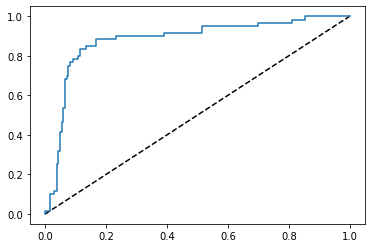

In [388]:
xtr,xte,ytr,yte=ttsc(x1b,y)
y_pred_pro=gbc4.predict_proba(xte)[:,1]
fpr,tpr,threshold=roc_curve(yte,y_pred_pro)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr,label='DTC')
plt.show()

In [389]:
roc_auc_score(yte,y_pred_pro)

0.8809009009009009

# Saving the model

In [390]:
# dtc2 is performing better owing to a better f1_score

In [383]:
pred=get_predc(dtc2,x1cb2,y)

In [384]:
predic=pd.DataFrame(pred)
predic.to_csv('pred_fraud.csv')

In [391]:
import joblib
joblib.dump(dtc2,'dtc_fraud.pkl')

['dtc_fraud.pkl']